**Denise Dodd: Olympics (Data Cleaning and Visualizations)**

# **Table of Contents**

[Milestone 1](#Milestone_1)

[Milestone 2](#Milestone_2)

[Milestone 2 Additions](#Milestone_2_Additions)

[Milestone 3](#Milestone_3)

[Milestone 4](#Milestone_4)

[Milestone 5](#Milestone_5)

# **Milestone 1** <a id="Milestone_1"></a>

For this project, I will be finding trends and connections with Olympic data. I anticipate using data points such as athlete metrics, changes over time, medal count, and seasonality. 

**Data Sources:**

**Flat File:** Olympic_Athlete_Event_Results.csv found via Kaggle. 

**Description:** This file has data on event results from the 1896 Olympics through the 2022 Olympics. Metrics include sport, event, each athlete’s result in said event, and several identification codes. 

**Link or Flat File uploaded:** https://www.kaggle.com/datasets/josephcheng123456/olympic-historical-dataset-from-olympediaorg?select=Olympic_Athlete_Event_Results.csv  

**API:** API Ninjas 

**Description:** I'm very much a novice at APIs so I’m hoping we learn more about them before we get to Milestone 4. I’ve selected a preferred API and a backup APIs in case my vision doesn’t come to fruition. Because I’m unsure of API usage I wanted to have some options if I needed to pivot. 

The API that I would like to use is the “Countries” API from API Ninjas which details a country’s max/min population, max/min GDP and other statistics. I thought it would be interesting to determine what percentage of people in each country has a medal or does a country’s finance have any effect on how well the athletes perform. 

My backup API is the “Geocoding” API from API Ninja. Because this requires both a city and country, I would have to use the host city’s information to look up information here. This API returns latitude and longitude information so perhaps I could determine if there is a difference in results if the Olympics are held in a southern vs northern hemisphere city. 

**Link:** https://api-ninjas.com/api  

**Website:** All-Time Olympic Games Medal Table via Wikipedia 

**Description:** A table displaying each Olympic country’s medal rank, number of gold, silver, bronze, and total medals. This table breaks it down by Summer Games, Winter Games, and Total Games medal counts.  These are total medal counts from 1896-2022. 

**Link:** https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table 
 

**Relationships**

The flat file and the Website can both be joined via the three-character IOC country code. The flat file already has this isolated. I will have to extract this from the “Team” Column of the Website. 

As noted in the description, the API directory can be joined either by the athlete’s IOC country code or by the host city’s city and country information. I would have to create a new col in the flat file to add in the city and country information based on the year and season and then use this new col to join API. 

I will begin by extracting and formatting the columns so they are compatible for joins. I will then drop any unnecessary or duplicate columns, so the final data frame is not as cumbersome. I will also check for duplicate entries due to spelling variations. I will then generate graphs to look for outliers. Once the data is cleaned, I will be looking for relationships between data points. 

I will find meaning in the data by looking for relationships and patterns between datapoints such as what sport offers the most medal opportunities? Does the location of the host city play a factor in which countries are most successful? Are the top medal winning countries in the summer Olympics also the top countries in the winter Olympics? This will be done via regression analysis and visualizations. 

In terms of ethical concerns, I can’t vouch for the validity of the data. I’m unsure the qualifications of the person who updated the Kaggle data, anyone can edit a Wikipedia page, and I’m unsure where the API pulls its data from. If this were to be used as an official document, I would research this further. As an exercise in joining, cleaning, and preparing data, I am hopeful that this will be an issue. An additional concern is that I’m unsure if it is fair to compare results from 1896 to results from 2022. A lot of advances have been made in terms of training, equipment, rule changes etc. so an athlete from 1896 might not recognize the 2022 version of their sport. 

# **Milestone 2** <a id="Milestone_2"></a>

Cleaning/Formatting Flat Data

**Transformation 1-** Replace headers to update names and include capitalization.

**Transformation 2-** Sort the data frame by Olympic_ID so the 1896 Olympics results are listed first and the 2022 Olympic results are listed last.

**Transformation 3-** Extract Olympic year from 'Olympics' col. This can be used later in visualizations to achieve a timeline.

**Transformation 4-** Extract additional information from 'Olympic' col. This time I will extract the season as it might be interesting later on to compare summer vs winter Olympic data.

**Transformation 5-** Create and populate unique ID col which can be used later when merging.

**Transformation 6-** Use mapping from 'edition_id' to create 'Host_City' and 'Host_Country' columns. These attributes might be used later when making an API call.

**Transformation 7-** Create a function that determines if someone is a medal winner. Create a new column designating medal winners. This could be interesting to later to determine what percentage of athletes are medal winners. And then later when joining to API what percentage of a country's population is a medal winner.

**Transformation 8-** The entries for 1956 Equestrian Olympics and 1906 Intercalated Games don't seem valid as there are few competitors and it's not during an Olympic year. I will check the unique values in the 'edition' col and drop any cols that aren't a Summer or Winter Olympic Games.

**Transformation 9-** Extract last word (gender) from event name. It will be interesting to see the medal opportunities for male versus female athletes.

**Transformation 10-** Explore unique values of 'Gender' col to ensure split was done correctly and update label names.

**Load modules and data.**

Data can be found here: https://www.kaggle.com/datasets/josephcheng123456/olympic-historical-dataset-from-olympediaorg?select=Olympic_Athlete_Event_Results.csv

In [1]:
# Import needed modules
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set directory and load data.
os.chdir('C:/Users/hadle/Downloads')
flat_df = pd.read_csv('Olympic_Athlete_Event_Results.csv')

# Check shape of dataframe and save it to a variable. This might be used in future steps to validate work.
current_shape = flat_df.shape
print(f"\033[1mThe shape of the dataframe is:\n\033[0m{current_shape}")

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
flat_df

The shape of the dataframe is:
(314907, 11)

Preview dataframe to check for accuracy:



,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,na,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,na,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,na,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,na,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,na,False
...,...,...,...,...,...,...,...,...,...,...,...
314902,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,na,False
314903,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,na,False
314904,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,na,False
314905,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,na,False


**Transformation 1-** Replace headers to update names and include capitalization.

In [3]:
# Define a list of new column names
column_names = ['Olympics', 'Olympic_ID', 'IOC_Code', 'Sport', 'Event', 'Result_ID', 'Athlete_Name', 'Athlete_ID', 'Result', 'Medal', 'Team_Sport']

#--------Below coding is similar for all transformations to check accuracy--------#
# Assign the new column names to the DataFrame
flat_df.columns = column_names

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
flat_df


Preview dataframe to check for accuracy:



,Olympics,Olympic_ID,IOC_Code,Sport,Event,Result_ID,Athlete_Name,Athlete_ID,Result,Medal,Team_Sport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,na,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,na,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,na,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,na,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,na,False
...,...,...,...,...,...,...,...,...,...,...,...
314902,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,na,False
314903,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,na,False
314904,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,na,False
314905,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,na,False


**Transformation 2-** Sort the data frame by Olympic_ID so the 1896 Olympics results are listed first and the 2022 Olympic results are listed last.

In [4]:
# Sort the values by the 'edition_id' col.
flat_df = flat_df.sort_values(by='Olympic_ID')

#--------Below coding is the same for all transformations to check accuracy--------#
# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
flat_df


Preview dataframe to check for accuracy:



,Olympics,Olympic_ID,IOC_Code,Sport,Event,Result_ID,Athlete_Name,Athlete_ID,Result,Medal,Team_Sport
160044,1896 Summer Olympics,1,FRA,Athletics,"Discus Throw, Men",56028,Louis Adler,922401,DNS,na,False
114028,1896 Summer Olympics,1,HUN,Athletics,"110 metres Hurdles, Men",56018,Pál Péthy,922408,DNS,na,False
114029,1896 Summer Olympics,1,HUN,Athletics,"High Jump, Men",56023,Gyula Kakas,30380,DNS,na,False
114030,1896 Summer Olympics,1,HUN,Athletics,"High Jump, Men",56023,Alajos Szokoly,71310,DNS,na,False
114031,1896 Summer Olympics,1,HUN,Athletics,"High Jump, Men",56023,Dezső Wein,71333,DNS,na,False
...,...,...,...,...,...,...,...,...,...,...,...
113597,2022 Winter Olympics,62,ROC,Alpine Skiing,"Slalom, Men",19019505,Aleksandr Khoroshilov,109900,10,na,False
113596,2022 Winter Olympics,62,ROC,Alpine Skiing,"Giant Slalom, Men",19019502,Ivan Kuznetsov,138399,DNF,na,False
113595,2022 Winter Olympics,62,ROC,Alpine Skiing,"Giant Slalom, Men",19019502,Aleksandr Andriyenko,148757,DNF,na,False
112742,2022 Winter Olympics,62,MDA,Biathlon,"15 kilometres, Women",19019638,Alla Ghilenko,148650,72,na,False


**Transformation 3-** Extract Olympic year from 'Olympics' col.  This can be used later in visualizations to achieve a timeline.

In [5]:
# Create new col named 'Year' which will be populated by the first 4 characters of the 'Olympics' col.
flat_df['Year'] = flat_df['Olympics'].str[:4]

# Convert the 'Year' column from string to integer.
flat_df['Year'] = flat_df['Year'].astype(int)

# Move Year col from end of dataframe to next to 'Olympic' col.
col = flat_df.pop('Year')
flat_df.insert(0, col.name, col)

#--------Below coding is similar for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{flat_df.shape}")

# Update the shape variable.
current_shape = flat_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
flat_df

The shape of the previous dataframe was:
(314907, 11)
The shape of the new dataframe is:
(314907, 12)

Preview dataframe to check for accuracy:



,Year,Olympics,Olympic_ID,IOC_Code,Sport,Event,Result_ID,Athlete_Name,Athlete_ID,Result,Medal,Team_Sport
160044,1896,1896 Summer Olympics,1,FRA,Athletics,"Discus Throw, Men",56028,Louis Adler,922401,DNS,na,False
114028,1896,1896 Summer Olympics,1,HUN,Athletics,"110 metres Hurdles, Men",56018,Pál Péthy,922408,DNS,na,False
114029,1896,1896 Summer Olympics,1,HUN,Athletics,"High Jump, Men",56023,Gyula Kakas,30380,DNS,na,False
114030,1896,1896 Summer Olympics,1,HUN,Athletics,"High Jump, Men",56023,Alajos Szokoly,71310,DNS,na,False
114031,1896,1896 Summer Olympics,1,HUN,Athletics,"High Jump, Men",56023,Dezső Wein,71333,DNS,na,False
...,...,...,...,...,...,...,...,...,...,...,...,...
113597,2022,2022 Winter Olympics,62,ROC,Alpine Skiing,"Slalom, Men",19019505,Aleksandr Khoroshilov,109900,10,na,False
113596,2022,2022 Winter Olympics,62,ROC,Alpine Skiing,"Giant Slalom, Men",19019502,Ivan Kuznetsov,138399,DNF,na,False
113595,2022,2022 Winter Olympics,62,ROC,Alpine Skiing,"Giant Slalom, Men",19019502,Aleksandr Andriyenko,148757,DNF,na,False
112742,2022,2022 Winter Olympics,62,MDA,Biathlon,"15 kilometres, Women",19019638,Alla Ghilenko,148650,72,na,False


**Transformation 4-** Extract additional information from 'Olympic' col.  This time I will extract the season as it might be interesting later to compare summer vs winter Olympic data.

In [6]:
# Create new col called 'Season'.
# Split the 'Olympics' col every time there is a space and assign the second word of the split to the 'Season' col.
flat_df['Season'] = flat_df['Olympics'].str.split().str[1]

# Move Season col from end of dataframe to next to 'Year' col.
col = flat_df.pop('Season')
flat_df.insert(1, col.name, col)

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{flat_df.shape}")

# Update the shape variable.
current_shape = flat_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
flat_df

The shape of the previous dataframe was:
(314907, 12)
The shape of the new dataframe is:
(314907, 13)

Preview dataframe to check for accuracy:



,Year,Season,Olympics,Olympic_ID,IOC_Code,Sport,Event,Result_ID,Athlete_Name,Athlete_ID,Result,Medal,Team_Sport
160044,1896,Summer,1896 Summer Olympics,1,FRA,Athletics,"Discus Throw, Men",56028,Louis Adler,922401,DNS,na,False
114028,1896,Summer,1896 Summer Olympics,1,HUN,Athletics,"110 metres Hurdles, Men",56018,Pál Péthy,922408,DNS,na,False
114029,1896,Summer,1896 Summer Olympics,1,HUN,Athletics,"High Jump, Men",56023,Gyula Kakas,30380,DNS,na,False
114030,1896,Summer,1896 Summer Olympics,1,HUN,Athletics,"High Jump, Men",56023,Alajos Szokoly,71310,DNS,na,False
114031,1896,Summer,1896 Summer Olympics,1,HUN,Athletics,"High Jump, Men",56023,Dezső Wein,71333,DNS,na,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113597,2022,Winter,2022 Winter Olympics,62,ROC,Alpine Skiing,"Slalom, Men",19019505,Aleksandr Khoroshilov,109900,10,na,False
113596,2022,Winter,2022 Winter Olympics,62,ROC,Alpine Skiing,"Giant Slalom, Men",19019502,Ivan Kuznetsov,138399,DNF,na,False
113595,2022,Winter,2022 Winter Olympics,62,ROC,Alpine Skiing,"Giant Slalom, Men",19019502,Aleksandr Andriyenko,148757,DNF,na,False
112742,2022,Winter,2022 Winter Olympics,62,MDA,Biathlon,"15 kilometres, Women",19019638,Alla Ghilenko,148650,72,na,False


**Transformation 5-** Create and populate unique ID col which can be used later when merging.

In [7]:
# Create new col and populate with unique IDs.
# Use a range of numbers from 0 to the length of the dataframe to ensure every entry gets unique ID.
flat_df['Unique_ID'] = range(0, len(flat_df))

# Move Unique_ID col from end of dataframe to the beginning.
col = flat_df.pop('Unique_ID')
flat_df.insert(0, col.name, col)

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{flat_df.shape}")

# Update the shape variable.
current_shape = flat_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
flat_df

The shape of the previous dataframe was:
(314907, 13)
The shape of the new dataframe is:
(314907, 14)

Preview dataframe to check for accuracy:



,Unique_ID,Year,Season,Olympics,Olympic_ID,IOC_Code,Sport,Event,Result_ID,Athlete_Name,Athlete_ID,Result,Medal,Team_Sport
160044,0,1896,Summer,1896 Summer Olympics,1,FRA,Athletics,"Discus Throw, Men",56028,Louis Adler,922401,DNS,na,False
114028,1,1896,Summer,1896 Summer Olympics,1,HUN,Athletics,"110 metres Hurdles, Men",56018,Pál Péthy,922408,DNS,na,False
114029,2,1896,Summer,1896 Summer Olympics,1,HUN,Athletics,"High Jump, Men",56023,Gyula Kakas,30380,DNS,na,False
114030,3,1896,Summer,1896 Summer Olympics,1,HUN,Athletics,"High Jump, Men",56023,Alajos Szokoly,71310,DNS,na,False
114031,4,1896,Summer,1896 Summer Olympics,1,HUN,Athletics,"High Jump, Men",56023,Dezső Wein,71333,DNS,na,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113597,314902,2022,Winter,2022 Winter Olympics,62,ROC,Alpine Skiing,"Slalom, Men",19019505,Aleksandr Khoroshilov,109900,10,na,False
113596,314903,2022,Winter,2022 Winter Olympics,62,ROC,Alpine Skiing,"Giant Slalom, Men",19019502,Ivan Kuznetsov,138399,DNF,na,False
113595,314904,2022,Winter,2022 Winter Olympics,62,ROC,Alpine Skiing,"Giant Slalom, Men",19019502,Aleksandr Andriyenko,148757,DNF,na,False
112742,314905,2022,Winter,2022 Winter Olympics,62,MDA,Biathlon,"15 kilometres, Women",19019638,Alla Ghilenko,148650,72,na,False


**Transformation 6-** Use mapping from 'edition_id' to create 'Host_City' and 'Host_Country' columns.  These attributes might be used later when making an API call.

In [8]:
# Create 2 dicts for mapping edition_id to the name of the host city and the name of the host country.
# This will likely by used later in the API call.
mapping = flat_df["Olympic_ID"]

id_to_city = {
1 : 'Athina', 
2 : 'Paris', 
3 : 'St. Louis', 
4 : 'Athina', 
5 : 'London', 
6 : 'Stockholm', 
7 : 'Antwerpen', 
8 : 'Paris', 
9 : 'Amsterdam', 
10 : 'Los Angeles', 
11 : 'Berlin', 
12 : 'London', 
13 : 'Helsinki', 
14 : 'Melbourne', 
15 : 'Roma', 
16 : 'Tokyo', 
17 : 'Mexico City', 
18 : 'Munich', 
19 : 'Montreal', 
20 : 'Moskva', 
21 : 'Los Angeles', 
22 : 'Seoul', 
23 : 'Barcelona', 
24 : 'Atlanta', 
25 : 'Sydney', 
26 : 'Athina', 
29 : 'Chamonix', 
30 : 'Sankt Moritz', 
31 : 'Lake Placid', 
32 : 'Garmisch-Partenkirchen', 
33 : 'Sankt Moritz', 
34 : 'Oslo', 
35 : "Cortina d'Ampezzo", 
36 : 'Squaw Valley', 
37 : 'Innsbruck', 
38 : 'Grenoble', 
39 : 'Sapporo', 
40 : 'Innsbruck', 
41 : 'Lake Placid', 
42 : 'Sarajevo', 
43 : 'Calgary', 
44 : 'Albertville', 
45 : 'Lillehammer', 
46 : 'Nagano', 
47 : 'Salt Lake City', 
48 : 'Stockholm', 
49 : 'Torino', 
50 : 'Berlin', 
51 : 'Helsinki', 
52 : 'London', 
53 : 'Beijing', 
54 : 'London', 
55 : 'Garmisch-Partenkirchen', 
56 : "Cortina d'Ampezzo", 
57 : 'Vancouver', 
58 : 'Sochi', 
59 : 'Rio de Janeiro', 
60 : 'PyeongChang', 
61 : 'Tokyo', 
62 : 'Beijing', 
63 : 'Paris', 
64 : 'Los Angeles', 
72 : "Milano-Cortina d'Ampezzo"
}

id_to_country = {
1 : 'GRE', 
2 : 'FRA', 
3 : 'USA', 
4 : 'GRE', 
5 : 'GBR', 
6 : 'SWE', 
7 : 'BEL', 
8 : 'FRA', 
9 : 'NED', 
10 : 'USA', 
11 : 'GER', 
12 : 'GBR', 
13 : 'FIN', 
14 : 'AUS', 
15 : 'ITA', 
16 : 'JPN', 
17 : 'MEX', 
18 : 'FRG', 
19 : 'CAN', 
20 : 'URS', 
21 : 'USA', 
22 : 'KOR', 
23 : 'ESP', 
24 : 'USA', 
25 : 'AUS', 
26 : 'GRE', 
29 : 'FRA', 
30 : 'SUI', 
31 : 'USA', 
32 : 'GER', 
33 : 'SUI', 
34 : 'NOR', 
35 : 'ITA', 
36 : 'USA', 
37 : 'AUT', 
38 : 'FRA', 
39 : 'JPN', 
40 : 'AUT', 
41 : 'USA', 
42 : 'YUG', 
43 : 'CAN', 
44 : 'FRA', 
45 : 'NOR', 
46 : 'JPN', 
47 : 'USA', 
48 : 'SWE', 
49 : 'ITA', 
50 : 'GER', 
51 : 'FIN', 
52 : 'GBR', 
53 : 'CHN', 
54 : 'GBR', 
55 : 'GER', 
56 : 'ITA', 
57 : 'CAN', 
58 : 'RUS', 
59 : 'BRA', 
60 : 'KOR', 
61 : 'JPN', 
62 : 'CHN', 
63 : 'FRA', 
64 : 'USA', 
72 : 'ITA', 
}

# Used map function to map from Olympic_ID to host city name and host country name and store in a new attributes.
flat_df['Host_City'] = mapping.map(id_to_city)
flat_df['Host_Country'] = mapping.map(id_to_country)

# Move Host_City and Host_Country cols from end of dataframe to next to 'edition' col.
col = flat_df.pop('Host_City')
flat_df.insert(4, col.name, col)

col = flat_df.pop('Host_Country')
flat_df.insert(5, col.name, col)

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{flat_df.shape}")

# Update the shape variable.
current_shape = flat_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
flat_df

The shape of the previous dataframe was:
(314907, 14)
The shape of the new dataframe is:
(314907, 16)

Preview dataframe to check for accuracy:



,Unique_ID,Year,Season,Olympics,Host_City,Host_Country,Olympic_ID,IOC_Code,Sport,Event,Result_ID,Athlete_Name,Athlete_ID,Result,Medal,Team_Sport
160044,0,1896,Summer,1896 Summer Olympics,Athina,GRE,1,FRA,Athletics,"Discus Throw, Men",56028,Louis Adler,922401,DNS,na,False
114028,1,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"110 metres Hurdles, Men",56018,Pál Péthy,922408,DNS,na,False
114029,2,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"High Jump, Men",56023,Gyula Kakas,30380,DNS,na,False
114030,3,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"High Jump, Men",56023,Alajos Szokoly,71310,DNS,na,False
114031,4,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"High Jump, Men",56023,Dezső Wein,71333,DNS,na,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113597,314902,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,ROC,Alpine Skiing,"Slalom, Men",19019505,Aleksandr Khoroshilov,109900,10,na,False
113596,314903,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,ROC,Alpine Skiing,"Giant Slalom, Men",19019502,Ivan Kuznetsov,138399,DNF,na,False
113595,314904,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,ROC,Alpine Skiing,"Giant Slalom, Men",19019502,Aleksandr Andriyenko,148757,DNF,na,False
112742,314905,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,MDA,Biathlon,"15 kilometres, Women",19019638,Alla Ghilenko,148650,72,na,False


**Transformation 7**- Create a function that determines if someone is a medal winner. Create a new column designating medal winners. This could be interesting to later to determine what percentage of athletes are medal winners. And then later when joining to API what percentage of a country's population is a medal winner.

In [9]:
# Get unique entries in 'medal' col to ensure na, Gold, Silver, and Bronze are the only options.
unique_medals = flat_df['Medal'].unique()

# Print the unique entries
print(f"\033[1mThe unique medal enteries are:\n\033[0m{unique_medals}")


# Create function to group entires based on if they are a medal winner or not.
def determine_medal(medal):
    if medal == 'na':
        return 'No'
    else:
        return 'Yes'

# Apply the grouping function over the entries in the 'medal' col and save the results in a new col named 'is_medal_winner'.
flat_df['is_medal_winner'] = flat_df['Medal'].apply(determine_medal)

# Move 'is_medal_winner' col from end of dataframe to next to original 'medal' col.
col = flat_df.pop('is_medal_winner')
flat_df.insert(15, col.name, col)

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{flat_df.shape}")

# Update the shape variable.
current_shape = flat_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
flat_df

The unique medal enteries are:
['na' 'Gold' 'Bronze' 'Silver']
The shape of the previous dataframe was:
(314907, 16)
The shape of the new dataframe is:
(314907, 17)

Preview dataframe to check for accuracy:



,Unique_ID,Year,Season,Olympics,Host_City,Host_Country,Olympic_ID,IOC_Code,Sport,Event,Result_ID,Athlete_Name,Athlete_ID,Result,Medal,is_medal_winner,Team_Sport
160044,0,1896,Summer,1896 Summer Olympics,Athina,GRE,1,FRA,Athletics,"Discus Throw, Men",56028,Louis Adler,922401,DNS,na,No,False
114028,1,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"110 metres Hurdles, Men",56018,Pál Péthy,922408,DNS,na,No,False
114029,2,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"High Jump, Men",56023,Gyula Kakas,30380,DNS,na,No,False
114030,3,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"High Jump, Men",56023,Alajos Szokoly,71310,DNS,na,No,False
114031,4,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"High Jump, Men",56023,Dezső Wein,71333,DNS,na,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113597,314902,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,ROC,Alpine Skiing,"Slalom, Men",19019505,Aleksandr Khoroshilov,109900,10,na,No,False
113596,314903,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,ROC,Alpine Skiing,"Giant Slalom, Men",19019502,Ivan Kuznetsov,138399,DNF,na,No,False
113595,314904,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,ROC,Alpine Skiing,"Giant Slalom, Men",19019502,Aleksandr Andriyenko,148757,DNF,na,No,False
112742,314905,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,MDA,Biathlon,"15 kilometres, Women",19019638,Alla Ghilenko,148650,72,na,No,False


**Transformation 8**- Drop rows.  The entries for 1956 Equestrian Olympics and 1906 Intercalated Games don't seem valid as there are few competitors and it's not during an Olympic year.  I will check the unique values in the 'edition' col and drop any cols that aren't a Summer or Winter Olympic Games.

In [10]:
# Find unique values in 'Olympics' col to determine if there are any rows that should be dropped.
print(flat_df['Olympics'].unique())

# Drop values that are not a Winter or Summer Olympics.
flat_df = flat_df[flat_df['Olympics'] != '1956 Equestrian Olympics']
flat_df = flat_df[flat_df['Olympics'] != '1906  Intercalated Games']

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
# Based on the above table, there were 300 participants in the Equestrian Olympics, so the new df should have 300 less rows than the previous df.
print(f"\033[1m\nThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{flat_df.shape}")

# Update the shape variable.
current_shape = flat_df.shape

['1896 Summer Olympics' '1900 Summer Olympics' '1904 Summer Olympics'
 '1906  Intercalated Games' '1908 Summer Olympics' '1912 Summer Olympics'
 '1920 Summer Olympics' '1924 Summer Olympics' '1928 Summer Olympics'
 '1932 Summer Olympics' '1936 Summer Olympics' '1948 Summer Olympics'
 '1952 Summer Olympics' '1956 Summer Olympics' '1960 Summer Olympics'
 '1964 Summer Olympics' '1968 Summer Olympics' '1972 Summer Olympics'
 '1976 Summer Olympics' '1980 Summer Olympics' '1984 Summer Olympics'
 '1988 Summer Olympics' '1992 Summer Olympics' '1996 Summer Olympics'
 '2000 Summer Olympics' '2004 Summer Olympics' '1924 Winter Olympics'
 '1928 Winter Olympics' '1932 Winter Olympics' '1936 Winter Olympics'
 '1948 Winter Olympics' '1952 Winter Olympics' '1956 Winter Olympics'
 '1960 Winter Olympics' '1964 Winter Olympics' '1968 Winter Olympics'
 '1972 Winter Olympics' '1976 Winter Olympics' '1980 Winter Olympics'
 '1984 Winter Olympics' '1988 Winter Olympics' '1992 Winter Olympics'
 '1994 Winter Ol

**Transformation 9**- Extract last word (gender) from event name. It will be interesting to see the medal opportunities for male versus female athletes.

In [11]:
# Create new col called 'Gender'.
# Split the 'Event' col every time there is a space and assign the final word of the split to the 'Gender' col.
flat_df['Gender'] = flat_df['Event'].str.split().str[-1]

# Move Gender col from end of dataframe to next to 'Event' col.
col = flat_df.pop('Gender')
flat_df.insert(10, col.name, col)

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{flat_df.shape}")

# Update the shape variable.
current_shape = flat_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
flat_df

The shape of the previous dataframe was:
(314584, 17)
The shape of the new dataframe is:
(314584, 18)

Preview dataframe to check for accuracy:



,Unique_ID,Year,Season,Olympics,Host_City,Host_Country,Olympic_ID,IOC_Code,Sport,Event,Gender,Result_ID,Athlete_Name,Athlete_ID,Result,Medal,is_medal_winner,Team_Sport
160044,0,1896,Summer,1896 Summer Olympics,Athina,GRE,1,FRA,Athletics,"Discus Throw, Men",Men,56028,Louis Adler,922401,DNS,na,No,False
114028,1,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"110 metres Hurdles, Men",Men,56018,Pál Péthy,922408,DNS,na,No,False
114029,2,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"High Jump, Men",Men,56023,Gyula Kakas,30380,DNS,na,No,False
114030,3,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"High Jump, Men",Men,56023,Alajos Szokoly,71310,DNS,na,No,False
114031,4,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"High Jump, Men",Men,56023,Dezső Wein,71333,DNS,na,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113597,314902,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,ROC,Alpine Skiing,"Slalom, Men",Men,19019505,Aleksandr Khoroshilov,109900,10,na,No,False
113596,314903,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,ROC,Alpine Skiing,"Giant Slalom, Men",Men,19019502,Ivan Kuznetsov,138399,DNF,na,No,False
113595,314904,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,ROC,Alpine Skiing,"Giant Slalom, Men",Men,19019502,Aleksandr Andriyenko,148757,DNF,na,No,False
112742,314905,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,MDA,Biathlon,"15 kilometres, Women",Women,19019638,Alla Ghilenko,148650,72,na,No,False


**Transformation 10**- Explore unique values of 'Gender' col to ensure split was done correctly and update label names.

In [12]:
# Get unique entries in 'Gender' col to ensure Men/Women are the only options.
unqiue_gender = flat_df['Gender'].unique()
print(unqiue_gender)

# Update gender labels so there are just 3 categories: Male, Female, and Mixed/Open.
flat_df['Gender'] = flat_df['Gender'].replace('Men', 'Male')
flat_df['Gender'] = flat_df['Gender'].replace('Boys', 'Male')
flat_df['Gender'] = flat_df['Gender'].replace('Women', 'Female')
flat_df['Gender'] = flat_df['Gender'].replace('Mixed', 'Mixed/Open')
flat_df['Gender'] = flat_df['Gender'].replace('Open', 'Mixed/Open')

# Check for accuracy.
unqiue_gender = flat_df['Gender'].unique()
print(unqiue_gender)

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{flat_df.shape}")

# Update the shape variable.
current_shape = flat_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
flat_df

['Men' 'Open' 'Women' 'Mixed' 'Boys']
['Male' 'Mixed/Open' 'Female']
The shape of the previous dataframe was:
(314584, 18)
The shape of the new dataframe is:
(314584, 18)

Preview dataframe to check for accuracy:



,Unique_ID,Year,Season,Olympics,Host_City,Host_Country,Olympic_ID,IOC_Code,Sport,Event,Gender,Result_ID,Athlete_Name,Athlete_ID,Result,Medal,is_medal_winner,Team_Sport
160044,0,1896,Summer,1896 Summer Olympics,Athina,GRE,1,FRA,Athletics,"Discus Throw, Men",Male,56028,Louis Adler,922401,DNS,na,No,False
114028,1,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"110 metres Hurdles, Men",Male,56018,Pál Péthy,922408,DNS,na,No,False
114029,2,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"High Jump, Men",Male,56023,Gyula Kakas,30380,DNS,na,No,False
114030,3,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"High Jump, Men",Male,56023,Alajos Szokoly,71310,DNS,na,No,False
114031,4,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"High Jump, Men",Male,56023,Dezső Wein,71333,DNS,na,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113597,314902,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,ROC,Alpine Skiing,"Slalom, Men",Male,19019505,Aleksandr Khoroshilov,109900,10,na,No,False
113596,314903,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,ROC,Alpine Skiing,"Giant Slalom, Men",Male,19019502,Ivan Kuznetsov,138399,DNF,na,No,False
113595,314904,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,ROC,Alpine Skiing,"Giant Slalom, Men",Male,19019502,Aleksandr Andriyenko,148757,DNF,na,No,False
112742,314905,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,MDA,Biathlon,"15 kilometres, Women",Female,19019638,Alla Ghilenko,148650,72,na,No,False


**Ethical Implications**

The two largest ethical implications that I came across while cleaning this dataset both pertained to linguistic differences.

The original dataset had the host city listed in the home country's language which in some cases can vary from the English language that the rest of the data set is primarily presented in. There were a few cities that had unique characters such as accent marks or umlauts that my keyboard cannot type. I used the English version of these city names and I then considered also using the English version of all cities just for consistency but at this time I chose to be true to the original data source. However, since this is a project that will be produced in English, I still might change these city names if there is trouble down the road caused by a language barrier.

Similarly, the original dataset has athlete names listed in their native language which again can utilize special characters not accessible on my keyboard. I left these characters in for the athletes as I don't anticipate having to filter or search by an athlete’s name and as such I won't need to use my keyboard to reproduce these names. Athlete names also presented a challenge as it was difficult to search for duplicates since an athlete can compete in more than one Olympics and even in more than one event at a single Olympics. Athletes can also change names (ie marriage, divorce, etc). The final complication with athlete names is that some cultures list the surname or family name first and some list it last. I was unsure if I should leave the names mixed to honor the way that the athletes prefer to be called or if I should standardize them in some way. In the end, I left it mixed and will likely rely on Athlete ID to reference particular athletes.

The final ethical implication was when I had to determine if there were any rows to drop. I opted to drop the 1956 Equestrian Olympics and the 1906 Intercalated Games because they took place in non-Olympic years and very few medals were awarded at these competitions. Therefore, I determined these were outliers and I chose to drop them from the dataframe.

# **Milestone 2 - Additions** <a id="Milestone_2_Additions"></a>

**Transformation 11-** Adjust IOC codes. As countries break apart and come together new names and IOC codes are assigned to the countries. In an attempt to minimize multiple titles for the same country, I will update the IOC codes.

In [13]:
# Manually update and replace the multiple IOC codes for one country with one IOC code.
flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('GDR', 'GER')
flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('FRG', 'GER')
flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('EUA', 'GER')
flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('SAA', 'GER')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('OAR', 'RUS')
flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('ROC', 'RUS')
flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('RU1', 'RUS')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('EUN', 'URS')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('TCH', 'CZE')
flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('BOH', 'CZE')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('YUG', 'SCG')
flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('UNK', 'SCG')
flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('KOS', 'SCG')
flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('MNE', 'SCG')
flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('SRB', 'SCG')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('ANZ', 'AUS')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('UAR', 'EGY')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('WIF', 'JAM')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('NEP', 'NPL')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('COR', 'KOR')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('MON', 'MGL')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('TPE', 'CHN')
flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('TWN', 'CHN')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('NIG', 'NGR')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('SRB', 'SCG')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('YAR', 'YEM')
flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('YMD', 'YEM')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('SSD', 'SUD')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('PRK', 'KOR')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('AHO', 'NED')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('ISV', 'USA')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('MAL', 'MAS')
flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('RHO', 'MAS')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('NBO', 'ZIM')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('VNM', 'VIE')

flat_df['IOC_Code'] = flat_df['IOC_Code'].replace('COD', 'CGO')

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{flat_df.shape}")

# Update the shape variable.
current_shape = flat_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
flat_df

The shape of the previous dataframe was:
(314584, 18)
The shape of the new dataframe is:
(314584, 18)

Preview dataframe to check for accuracy:



,Unique_ID,Year,Season,Olympics,Host_City,Host_Country,Olympic_ID,IOC_Code,Sport,Event,Gender,Result_ID,Athlete_Name,Athlete_ID,Result,Medal,is_medal_winner,Team_Sport
160044,0,1896,Summer,1896 Summer Olympics,Athina,GRE,1,FRA,Athletics,"Discus Throw, Men",Male,56028,Louis Adler,922401,DNS,na,No,False
114028,1,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"110 metres Hurdles, Men",Male,56018,Pál Péthy,922408,DNS,na,No,False
114029,2,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"High Jump, Men",Male,56023,Gyula Kakas,30380,DNS,na,No,False
114030,3,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"High Jump, Men",Male,56023,Alajos Szokoly,71310,DNS,na,No,False
114031,4,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Athletics,"High Jump, Men",Male,56023,Dezső Wein,71333,DNS,na,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113597,314902,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,RUS,Alpine Skiing,"Slalom, Men",Male,19019505,Aleksandr Khoroshilov,109900,10,na,No,False
113596,314903,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,RUS,Alpine Skiing,"Giant Slalom, Men",Male,19019502,Ivan Kuznetsov,138399,DNF,na,No,False
113595,314904,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,RUS,Alpine Skiing,"Giant Slalom, Men",Male,19019502,Aleksandr Andriyenko,148757,DNF,na,No,False
112742,314905,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,MDA,Biathlon,"15 kilometres, Women",Female,19019638,Alla Ghilenko,148650,72,na,No,False


**Transformation 12**- Create a new "Athlete_Country" col and use mapping to assign an athlete country to each IOC code.  This will be used later when confirming that tables were joined accurately.

In [14]:
# In an effort to get a list of all IOC codes which will require mapping,
# assign all of the unique IOC codes in the dataframe to a list.
unique_ioc_codes = flat_df['IOC_Code'].unique()

# Use a loop to print each IOC code in the unique_ioc_codes list.
def print_code(list):
    for i in list:
        print(i)  

In [15]:
# Create a dictionary for mapping IOC_code to the name of the country the athlete is representing.
mapping = flat_df["IOC_Code"]

ioc_to_athcountry = {
"AFG":"Afghanistan",
"ALB":"Albania",
"ALG":"Algeria",
"ASA":"American Samoa",
"AND":"Andorra",
"ANG":"Angola",
"ANT":"Antigua and Barbuda",
"ARG":"Argentina",
"ARM":"Armenia",
"ARU":"Aruba",
"ANZ":"Australasia",
"AUS":"Australia",
"AUT":"Austria",
"AZE":"Azerbaijan",
"BRN":"Bahrain",
"BAN":"Bangladesh",
"BAR":"Barbados",
"BLR":"Belarus",
"BEL":"Belgium",
"BIZ":"Belize",
"BEN":"Benin",
"BER":"Bermuda",
"BHU":"Bhutan",
"BOH":"Bohemia",
"BOL":"Bolivia",
"BIH":"Bosnia and Herzegovina",
"BOT":"Botswana",
"BRA":"Brazil",
"IVB":"British Virgin Islands",
"BRU":"Brunei Darussalam",
"BUL":"Bulgaria",
"BUR":"Burkina Faso",
"BDI":"Burundi",
"CAM":"Cambodia",
"CMR":"Cameroon",
"CAN":"Canada",
"CPV":"Cape Verde",
"CAY":"Cayman Islands",
"CAF":"Central African Republic",
"CHA":"Chad",
"CHI":"Chile",
"TPE":"Chinese Taipei",
"COL":"Colombia",
"COM":"Comoros",
"CGO":"Congo",
"COK":"Cook Islands",
"CRC":"Costa Rica",
"CIV":"CÃ´te d'Ivoire",
"CRT":"Crete",
"CRO":"Croatia",
"CUB":"Cuba",
"CYP":"Cyprus",
"CZE":"Czech Republic",
"TCH":"Czechoslovakia",
"PRK":"Democratic People's Republic of Korea",
"CGO":"Democratic Republic of the Congo",
"DEN":"Denmark",
"DJI":"Djibouti",
"DMA":"Dominica",
"DOM":"Dominican Republic",
"GDR":"East Germany",
"ECU":"Ecuador",
"EGY":"Egypt",
"ESA":"El Salvador",
"GEQ":"Equatorial Guinea",
"ERI":"Eritrea",
"EST":"Estonia",
"SWZ":"Eswatini",
"ETH":"Ethiopia",
"FSM":"Federated States of Micronesia",
"FIJ":"Fiji",
"FIN":"Finland",
"FRA":"France",
"GAB":"Gabon",
"GEO":"Georgia",
"GER":"Germany",
"GHA":"Ghana",
"GBR":"Great Britain",
"GRE":"Greece",
"GRN":"Grenada",
"GUM":"Guam",
"GUA":"Guatemala",
"GUI":"Guinea",
"GBS":"Guinea Bissau",
"GUY":"Guyana",
"HAI":"Haiti",
"HON":"Honduras",
"HKG":"Hong Kong, China",
"HUN":"Hungary",
"ISL":"Iceland",
"IND":"India",
"IOA":"Individual Olympic Athletes",
"INA":"Indonesia",
"IRQ":"Iraq",
"IRL":"Ireland",
"IRI":"Islamic Republic of Iran",
"ISR":"Israel",
"ITA":"Italy",
"JAM":"Jamaica",
"JPN":"Japan",
"JOR":"Jordan",
"KAZ":"Kazakhstan",
"KEN":"Kenya",
"KSA":"Kingdom of Saudi Arabia",
"KIR":"Kiribati",
"COR":"Korea Team",
"KOS":"Kosovo",
"KUW":"Kuwait",
"KGZ":"Kyrgyzstan",
"LAO":"Lao People's Democratic Republic",
"LAT":"Latvia",
"LBN":"Lebanon",
"LES":"Lesotho",
"LBR":"Liberia",
"LBA":"Libya",
"LIE":"Liechtenstein",
"LTU":"Lithuania",
"LUX":"Luxembourg",
"MAD":"Madagascar",
"MAW":"Malawi",
"MAS":"Malaya",
"MAS":"Malaysia",
"MDV":"Maldives",
"MLI":"Mali",
"MLT":"Malta",
"MHL":"Marshall Islands",
"MTN":"Mauritania",
"MRI":"Mauritius",
"MEX":"Mexico",
"MIX":"Mixed team",
"MON":"Monaco",
"MGL":"Mongolia",
"MNE":"Montenegro",
"MAR":"Morocco",
"MOZ":"Mozambique",
"MYA":"Myanmar",
"NAM":"Namibia",
"NRU":"Nauru",
"NEP":"Nepal",
"NED":"Netherlands",
"AHO":"Netherlands Antilles",
"NZL":"New Zealand",
"NFL":"Newfoundland",
"NCA":"Nicaragua",
"NIG":"Niger",
"NGR":"Nigeria",
"NBO":"North Borneo",
"MKD":"North Macedonia",
"YAR":"North Yemen",
"NOR":"Norway",
"OMA":"Oman",
"PAK":"Pakistan",
"PLW":"Palau",
"PLE":"Palestine",
"PAN":"Panama",
"PNG":"Papua New Guinea",
"PAR":"Paraguay",
"CHN":"People's Republic of China",
"PER":"Peru",
"PHI":"Philippines",
"POL":"Poland",
"POR":"Portugal",
"PUR":"Puerto Rico",
"QAT":"Qatar",
"EOR":"Refugee Olympic Team",
"KOR":"Republic of Korea",
"MDA":"Republic of Moldova",
"RHO":"Rhodesia",
"ROC":"ROC",
"ROU":"Romania",
"RUS":"Russian Federation",
"RWA":"Rwanda",
"SAA":"Saar",
"SKN":"Saint Kitts and Nevis",
"LCA":"Saint Lucia",
"VIN":"Saint Vincent and the Grenadines",
"SAM":"Samoa",
"SMR":"San Marino",
"STP":"Sao Tome And Principe",
"SEN":"Senegal",
"SRB":"Serbia",
"SCG":"Serbia and Montenegro",
"SEY":"Seychelles",
"SLE":"Sierra Leone",
"SGP":"Singapore",
"SVK":"Slovakia",
"SLO":"Slovenia",
"SOL":"Solomon Islands",
"SOM":"Somalia",
"RSA":"South Africa",
"SSD":"South Sudan",
"VIE":"South Vietnam",
"YMD":"South Yemen",
"URS":"Soviet Union",
"ESP":"Spain",
"SRI":"Sri Lanka",
"SUD":"Sudan",
"SUR":"Suriname",
"SWE":"Sweden",
"SUI":"Switzerland",
"SYR":"Syrian Arab Republic",
"TJK":"Tajikistan",
"THA":"Thailand",
"BAH":"The Bahamas",
"GAM":"The Gambia",
"TLS":"Timor-Leste",
"TOG":"Togo",
"TGA":"Tonga",
"TTO":"Trinidad and Tobago",
"TUN":"Tunisia",
"TUR":"TÃ¼rkiye",
"TKM":"Turkmenistan",
"TUV":"Tuvalu",
"UGA":"Uganda",
"UKR":"Ukraine",
"EUN":"Unified Team",
"UAE":"United Arab Emirates",
"UAR":"United Arab Republic",
"TAN":"United Republic of Tanzania",
"USA":"United States",
"ISV":"United States Virgin Islands",
"UNK":"Unknown",
"URU":"Uruguay",
"UZB":"Uzbekistan",
"VAN":"Vanuatu",
"VEN":"Venezuela",
"VIE":"Vietnam",
"FRG":"West Germany",
"WIF":"West Indies Federation",
"YEM":"Yemen",
"YUG":"Yugoslavia",
"ZAM":"Zambia",
"ZIM":"Zimbabwe",
"ROC":"Russian Olympic Committee",
"NPL":"Nepal"
}

# Used map function to map from IOC Code to Athlete Country and store in a new col.
flat_df['Athlete_Country'] = mapping.map(ioc_to_athcountry)

# Move Athlete_Country col so it's next to IOC_Code col.
col = flat_df.pop('Athlete_Country')
flat_df.insert(8, col.name, col)

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{flat_df.shape}")

# Update the shape variable.
current_shape = flat_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
flat_df

The shape of the previous dataframe was:
(314584, 18)
The shape of the new dataframe is:
(314584, 19)

Preview dataframe to check for accuracy:



,Unique_ID,Year,Season,Olympics,Host_City,Host_Country,Olympic_ID,IOC_Code,Athlete_Country,Sport,Event,Gender,Result_ID,Athlete_Name,Athlete_ID,Result,Medal,is_medal_winner,Team_Sport
160044,0,1896,Summer,1896 Summer Olympics,Athina,GRE,1,FRA,France,Athletics,"Discus Throw, Men",Male,56028,Louis Adler,922401,DNS,na,No,False
114028,1,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Hungary,Athletics,"110 metres Hurdles, Men",Male,56018,Pál Péthy,922408,DNS,na,No,False
114029,2,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Hungary,Athletics,"High Jump, Men",Male,56023,Gyula Kakas,30380,DNS,na,No,False
114030,3,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Hungary,Athletics,"High Jump, Men",Male,56023,Alajos Szokoly,71310,DNS,na,No,False
114031,4,1896,Summer,1896 Summer Olympics,Athina,GRE,1,HUN,Hungary,Athletics,"High Jump, Men",Male,56023,Dezső Wein,71333,DNS,na,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113597,314902,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,RUS,Russian Federation,Alpine Skiing,"Slalom, Men",Male,19019505,Aleksandr Khoroshilov,109900,10,na,No,False
113596,314903,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,RUS,Russian Federation,Alpine Skiing,"Giant Slalom, Men",Male,19019502,Ivan Kuznetsov,138399,DNF,na,No,False
113595,314904,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,RUS,Russian Federation,Alpine Skiing,"Giant Slalom, Men",Male,19019502,Aleksandr Andriyenko,148757,DNF,na,No,False
112742,314905,2022,Winter,2022 Winter Olympics,Beijing,CHN,62,MDA,Republic of Moldova,Biathlon,"15 kilometres, Women",Female,19019638,Alla Ghilenko,148650,72,na,No,False


In [16]:
# Check to ensure mapping is done correctly and there are no nulls in Athlete_Country col.
flat_df[flat_df['Athlete_Country'].isnull()]

,Unique_ID,Year,Season,Olympics,Host_City,Host_Country,Olympic_ID,IOC_Code,Athlete_Country,Sport,Event,Gender,Result_ID,Athlete_Name,Athlete_ID,Result,Medal,is_medal_winner,Team_Sport


# **Milestone 3** <a id="Milestone_3"></a>

Cleaning/Formatting Website Data

**Transformation 1-** Convert table to pandas dataframe for ease of reading and coding.

**Transformation 2-** Replace headers with names that will more accurately represent the data.

**Transformation 3-** Drop rows that aren't relevant.

**Transformation 4-** Remove data in brackets in 'Country' col. When attempting to drop rows I think the backets in the 'Country' col was causing issues with my coding which is why I used the location when dropping above, but I prefer to manipulate rows by name.

**Transformation 5-** Sort by Combo_Attended to search for outliers and determine if there are any rows that should be combined or dropped as countries combine and break apart for geopolitical reasons.

**Transformation 6-** Combine rows. Based on the above, there are some rows are a part of a greater group such as Russia, Russian Empire, and Olympic Athletes from Russia. Because all of these groups are competing for the same country, I will attempt to combine these rows.

**Transformation 7-** Sort again by Combo_Attended. I believe now that I've combined rows that there might be some outliers on the upper end. For example, East and West Germany likely attended the same Olympics and are now being double counted in the attendance columns. This will also be a good check that I completed the previous transformation correctly.

**Transformation 8-** Adjust attendance records.

**Transformation 9-** Since I've combined rows and added new rows, and sorted by attendance, I need to reset the dataframe by alphabetizing by country.

**Transformation 10-** Add "ranks" cols showing where each country ranks in regard to total summer, winter, and combined medals.

**Transformation 11-** Rearrange cols so the number of games attended, the total medals, and rank cols are next to each other for summer, winter, and combo. Having these cols next to each other will make it easier to read and contextualize this data.

**Transformation 12-** Separate country name and 3-character IOC country code.

**Load modules and data.**

Data can be found here: https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table

In [17]:
# Load needed modules
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [18]:
# URL of the  webpage with the medal table
url = "https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table"

# Send an HTTP GET request to fetch the page content
response = requests.get(url)

# Use if loop to determine if there was a successful connection, select the necessary table, and parse the data.
# If unsuccessful repsponse print error message.
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', {'class': 'wikitable'})
    print(table)
else:
    print("Failed to retrieve the web page.")

<table class="wikitable sortable" style="margin-top:0; text-align:center; font-size:90%;">
<tbody><tr>
<th>Team
</th>
<th align="center" colspan="5" style="background-color:#f2f2ce;"><a href="/wiki/Summer_Olympic_Games" title="Summer Olympic Games">Summer Olympic Games</a>
</th>
<th align="center" colspan="5" style="background-color:#cedff2;"><a href="/wiki/Winter_Olympic_Games" title="Winter Olympic Games">Winter Olympic Games</a>
</th>
<th align="center" colspan="5"><a href="/wiki/Olympic_Games" title="Olympic Games">Combined total</a>
</th></tr>
<tr>
<th><style data-mw-deduplicate="TemplateStyles:r1038841319">.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}</style><span class="rt-commentedText tooltip tooltip-dotted" title="International Olympic Committee country code">Team (IOC code)</span>
</th>
<th style="background-color:#f2f2ce; width:2em;">
<p><link href="mw-data:TemplateStyles:r1038841319" rel="mw-deduplicated-inline-style"/><span class="rt-commentedTex

**Transformation 1-** Convert table to pandas dataframe for ease of reading and coding.

In [19]:
# Read the data  of the first table on the webpage into a pandas dataframe.
web_df = pd.read_html(str(table))[0]

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the current dataframe is:\n\033[0m{web_df.shape}")

# Update the shape variable.
current_shape = web_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
web_df

The shape of the current dataframe is:
(157, 16)

Preview dataframe to check for accuracy:



Team  \
    .mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Team (IOC code)   
0                                    Afghanistan (AFG)                                       
1                                        Algeria (ALG)                                       
2                                      Argentina (ARG)                                       
3                                        Armenia (ARM)                                       
4                              Australasia (ANZ) [ANZ]                                       
..                                                 ...                                       
152                               Zimbabwe (ZIM) [ZIM]                                       
153           Independent Olympic Athletes (IOA) [IOA]                                       
154       Independent Olympic Participants (IOP) [IOP]                                       
155                             Mixed team (ZZX) [ZZX]                                       
156                                             Totals                                       

    Summer Olympic Games                                        \
                     No. Unnamed: 2_level_1 Unnamed: 3_level_1   
0                     15                  0                  0   
1                     14                  5                  4   
2                     25                 21                 26   
3                      7                  2                  8   
4                      2                  3                  4   
..                   ...                ...                ...   
152                   14                  3                  4   
153                    3                  1                  0   
154                    1                  0                  1   
155                    3                 11                  6   
156                   29               5460               5429   

                                          Winter Olympic Games  \
    Unnamed: 4_level_1 Unnamed: 5_level_1                  No.   
0                    2                  2                    0   
1                    8                 17                    3   
2                   30                 77                   20   
3                    8                 18                    8   
4                    5                 12                    0   
..                 ...                ...                  ...   
152                  1                  8                    1   
153                  1                  2                    0   
154                  2                  3                    0   
155                  8                 25                    0   
156               5892              16781                   24   

                                                              \
    Unnamed: 7_level_1 Unnamed: 8_level_1 Unnamed: 9_level_1   
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    0                  0                  0   
4                    0                  0                  0   
..                 ...                ...                ...   
152                  0                  0                  0   
153                  0                  0                  0   
154                  0                  0                  0   
155                  0                  0                  0   
156               1171               1169               1160   

                        Combined total                      \
    Unnamed: 10_level_1            No. Unnamed: 12_level_1   
0                     0             15                   0   
1                     0             17                   5   
2                     0             45                  21   
3 

**Transformation 2-** Replace headers to names that will more accurately represent the data.

In [20]:
# Define a list of new column names
column_names = ['Country', 'Summer_Attended', 'Summer_Gold', 'Summer_Silver', 'Summer_Bronze', 'Summer_Total', 'Winter_Attended', 'Winter_Gold', 'Winter_Silver', 'Winter_Bronze', 'Winter_Total', 'Combo_Attended', 'Combo_Gold', 'Combo_Silver', 'Combo_Bronze', 'Combo_Total']

# Assign the new column names to the DataFrame
web_df.columns = column_names

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{web_df.shape}")

# Update the shape variable.
current_shape = web_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
# web_df

web_df.head(25)

The shape of the previous dataframe was:
(157, 16)
The shape of the new dataframe is:
(157, 16)

Preview dataframe to check for accuracy:



,Country,Summer_Attended,Summer_Gold,Summer_Silver,Summer_Bronze,Summer_Total,Winter_Attended,Winter_Gold,Winter_Silver,Winter_Bronze,Winter_Total,Combo_Attended,Combo_Gold,Combo_Silver,Combo_Bronze,Combo_Total
0,Afghanistan (AFG),15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,Algeria (ALG),14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,Argentina (ARG),25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
3,Armenia (ARM),7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia (AUS) [AUS] [Z],27,164,173,210,547,20,6,7,6,19,47,170,180,216,566
6,Austria (AUT),28,20,35,41,96,24,71,88,91,250,52,91,123,132,346
7,Azerbaijan (AZE),7,7,14,28,49,7,0,0,0,0,14,7,14,28,49
8,Bahamas (BAH),17,8,2,6,16,0,0,0,0,0,17,8,2,6,16
9,Bahrain (BRN),10,2,2,0,4,0,0,0,0,0,10,2,2,0,4


**Transformation 3-** Drop rows that aren't relevant.

In [21]:
# Inspect the values in the country col.
print(web_df['Country'].unique())

# I thought there would be more rows to drop, but I think mostly I'll need to combine rows which I'll do in the next step.
# Below I am dropping two rows (Mixed team and Totals) as there are no corresponding rows in the dataframe of my flat file,
# and I don't believe dropping these rows will impact the overall study.
web_df = web_df.drop([155, 156])

# Below I am also dropping British West Indies and Australasia.
# BWI competed in 1 Olympic Games and Australasia competed in 2.
# Both entities now compete under several different flags.
web_df = web_df.drop([17, 4])

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{web_df.shape}")

# Update the shape variable.
current_shape = web_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
web_df

['Afghanistan\xa0(AFG)' 'Algeria\xa0(ALG)' 'Argentina\xa0(ARG)'
 'Armenia\xa0(ARM)' 'Australasia\xa0(ANZ) [ANZ]'
 'Australia\xa0(AUS) [AUS] [Z]' 'Austria\xa0(AUT)' 'Azerbaijan\xa0(AZE)'
 'Bahamas\xa0(BAH)' 'Bahrain\xa0(BRN)' 'Barbados\xa0(BAR) [BAR]'
 'Belarus\xa0(BLR)' 'Belgium\xa0(BEL)' 'Bermuda\xa0(BER)'
 'Bohemia\xa0(BOH) [BOH] [Z]' 'Botswana\xa0(BOT)' 'Brazil\xa0(BRA)'
 'British West Indies\xa0(BWI) [BWI]' 'Bulgaria\xa0(BUL) [H]'
 'Burkina Faso\xa0(BUR)' 'Burundi\xa0(BDI)' 'Cameroon\xa0(CMR)'
 'Canada\xa0(CAN)' 'Chile\xa0(CHI) [I]' 'China\xa0(CHN) [CHN]'
 'Colombia\xa0(COL)' 'Costa Rica\xa0(CRC)' 'Ivory Coast\xa0(CIV) [CIV]'
 'Croatia\xa0(CRO)' 'Cuba\xa0(CUB) [Z]' 'Cyprus\xa0(CYP)'
 'Czech Republic\xa0(CZE) [CZE]' 'Czechoslovakia\xa0(TCH) [TCH]'
 'Denmark\xa0(DEN) [Z]' 'Djibouti\xa0(DJI) [B]'
 'Dominican Republic\xa0(DOM)' 'Ecuador\xa0(ECU)'
 'Egypt\xa0(EGY) [EGY] [Z]' 'Eritrea\xa0(ERI)' 'Estonia\xa0(EST)'
 'Ethiopia\xa0(ETH)' 'Fiji\xa0(FIJ)' 'Finland\xa0(FIN)'
 'France\xa0(FRA) [

,Country,Summer_Attended,Summer_Gold,Summer_Silver,Summer_Bronze,Summer_Total,Winter_Attended,Winter_Gold,Winter_Silver,Winter_Bronze,Winter_Total,Combo_Attended,Combo_Gold,Combo_Silver,Combo_Bronze,Combo_Total
0,Afghanistan (AFG),15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,Algeria (ALG),14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,Argentina (ARG),25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
3,Armenia (ARM),7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
5,Australia (AUS) [AUS] [Z],27,164,173,210,547,20,6,7,6,19,47,170,180,216,566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Yugoslavia (YUG) [YUG to 1992],16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
151,Zambia (ZAM) [ZAM],14,0,1,1,2,0,0,0,0,0,14,0,1,1,2
152,Zimbabwe (ZIM) [ZIM],14,3,4,1,8,1,0,0,0,0,15,3,4,1,8
153,Independent Olympic Athletes (IOA) [IOA],3,1,0,1,2,0,0,0,0,0,3,1,0,1,2


**Transformation 4** - Remove data in brackets in 'Country' col.  When attempting to drop rows I think the backets in the 'Country' col was causing issues with my coding which is why I used the location when dropping above, but I prefer to manipulate rows by name.

In [22]:
# Split the 'Country' col at the open bracket ('[') character.
# Use expand=True to return dataframe instead of list.
# Return the first col of the resulting dataframe ([0]) which holds the portion of the 'Country' col prior to the open bracket.
web_df['Country'] = web_df['Country'].str.split(' \[', expand=True)[0]

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{web_df.shape}")

# Update the shape variable.
current_shape = web_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
web_df

The shape of the previous dataframe was:
(153, 16)
The shape of the new dataframe is:
(153, 16)

Preview dataframe to check for accuracy:



,Country,Summer_Attended,Summer_Gold,Summer_Silver,Summer_Bronze,Summer_Total,Winter_Attended,Winter_Gold,Winter_Silver,Winter_Bronze,Winter_Total,Combo_Attended,Combo_Gold,Combo_Silver,Combo_Bronze,Combo_Total
0,Afghanistan (AFG),15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,Algeria (ALG),14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,Argentina (ARG),25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
3,Armenia (ARM),7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
5,Australia (AUS),27,164,173,210,547,20,6,7,6,19,47,170,180,216,566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Yugoslavia (YUG),16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
151,Zambia (ZAM),14,0,1,1,2,0,0,0,0,0,14,0,1,1,2
152,Zimbabwe (ZIM),14,3,4,1,8,1,0,0,0,0,15,3,4,1,8
153,Independent Olympic Athletes (IOA),3,1,0,1,2,0,0,0,0,0,3,1,0,1,2


**Transformation 5-** Sort by Combo_Attended to search for outliers and determine if there are any rows that should be combined or dropped as countries combine and break apart for geopolitical reasons.

In [23]:
# Sort the dataframe by the combined number of games each country has attended.
web_df = web_df.sort_values(by='Combo_Attended')

# Print both the head and the tail to look for outliers.
# Only printing the Country and Combo_Attended cols.
print(web_df[['Country', 'Combo_Attended']].head(25))
print(web_df[['Country', 'Combo_Attended']].tail(25))

                                    Country  Combo_Attended
154  Independent Olympic Participants (IOP)               1
112      Olympic Athletes from Russia (OAR)               1
111                      Unified Team (EUN)               2
113                               ROC (ROC)               2
153      Independent Olympic Athletes (IOA)               3
14                            Bohemia (BOH)               3
109                    Russian Empire (RU1)               3
72                             Kosovo (KOS)               4
47             United Team of Germany (EUA)               6
119             Serbia and Montenegro (SCG)               6
140                      Turkmenistan (TKM)               7
20                            Burundi (BDI)               7
87                         Montenegro (MNE)               8
90                            Namibia (NAM)               8
38                            Eritrea (ERI)               8
34                           Djibouti (D

**Transformation 6-** Combine rows. Based on the above, there are some rows are a part of a greater group such as Russia, Russian Empire, and Olympic Athletes from Russia.  Because all of these groups are competing for the same country, I will attempt to combine these rows.

In [24]:
# I attempted to identify rows using the Country col, but kept running into trouble and removing the brackets didn't solve it.
# I resorted to using the location method as I did above when I dropped some cols.

# Use for loop to iterate through all entries in country col and print country name and corresponding index.
# This will be used for future coding in this section.
for index, country in enumerate(web_df['Country']):
    print(f"Row {index}: {country}")

# Here I make a filtered dataframe with the Independent Olympic Athletes and Independent Olympic Participants.
ioa_df = web_df.iloc[[0, 4]]

# Calculate the sums of all columns for the filtered dataframe.
totals = ioa_df.sum(numeric_only=True)

# Set the "Country" value for the totals row to "Independent Olympic Athletes (IOA)"
totals['Country'] = 'Independent Olympic Athletes (IOA)'

# Add the newly combined row back into the original dataframe.
web_df = web_df.append(totals, ignore_index=True)

#Repeat the above steps for Russia, ROC, Olympic Athletes from Russia, and Russian Empire.
rus_df = web_df.iloc[[1, 3, 6, 31]]
totals = rus_df.sum(numeric_only=True)
totals['Country'] = 'Russia (RUS)'
web_df = web_df.append(totals, ignore_index=True)

#Repeat the above steps for Germany, West Germany, East Germany, and United Team of Germany.
ger_df = web_df.iloc[[115, 24, 26, 8]]
totals = ger_df.sum(numeric_only=True)
totals['Country'] = 'Germany (GER)'
web_df = web_df.append(totals, ignore_index=True)

#Repeat the above steps for Soviet Union/Unified Team.
urs_df = web_df.iloc[[77, 2]]
totals = urs_df.sum(numeric_only=True)
totals['Country'] = 'Soviet Union (URS)'
web_df = web_df.append(totals, ignore_index=True)

#Repeat the above steps for Czech Republic/Czechoslovakia/Bohemia.
cze_df = web_df.iloc[[60, 118,5]]
totals = cze_df.sum(numeric_only=True)
totals['Country'] = 'Czech Republic (CZE)'
web_df = web_df.append(totals, ignore_index=True)
                    
#Repeat the above steps for Serbia and Montenegro, Serbia, Montenegro, Yugoslavia, and Kosovo.
scg_df = web_df.iloc[[9, 117, 7, 12, 16]]
totals = scg_df.sum(numeric_only=True)
totals['Country'] = 'Serbia and Montenegro (SCG)'
web_df = web_df.append(totals, ignore_index=True)  

#Repeat the above steps for Niger and Nigeria.
#These are not the same country but rather 'sister countries'. However, as I progress through this exercise,
#I discovered that other dataframes have combined these countries so I will do the same.
ngr_df = web_df.iloc[[84, 34]]
totals = ngr_df.sum(numeric_only=True)
totals['Country'] = 'Nigeria (NGR)'
web_df = web_df.append(totals, ignore_index=True)  

#Repeat the above steps for Netherlands and Netherlands Antilles.
ned_df = web_df.iloc[[50, 140]]
totals = ned_df.sum(numeric_only=True)
totals['Country'] = 'Netherlands (NED)'
web_df = web_df.append(totals, ignore_index=True)

#Repeat the above steps for China, and Taipei.
chn_df = web_df.iloc[[99, 111]]
totals = chn_df.sum(numeric_only=True)
totals['Country'] = 'China (CHN)'
web_df = web_df.append(totals, ignore_index=True)

#Repeat the above steps for North and South Korea.
#Korea initially competed as a unified country, then two separate countries, and are now again competing as a unified country.
kor_df = web_df.iloc[[125, 85]]
totals = kor_df.sum(numeric_only=True)
totals['Country'] = 'Korea (KOR)'
web_df = web_df.append(totals, ignore_index=True) 

# #Repeat the above steps for Virgin Islands and United States.
usa_df = web_df.iloc[[89, 149]]
totals = usa_df.sum(numeric_only=True)
totals['Country'] = 'United States (USA)'
web_df = web_df.append(totals, ignore_index=True) 

# Drop rows that have been combined in filtered dataframe and added back from the original dataframe.
web_df = web_df.drop([0, 4, 1, 3, 6, 31, 115, 24, 26, 8, 77, 2, 60, 118,5, 9, 117,7, 12, 84, 34, 50,
                      140, 125, 85, 99, 111, 16, 89, 149])
                    
#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{web_df.shape}")

# Update the shape variable.
current_shape = web_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
web_df

Row 0: Independent Olympic Participants (IOP)
Row 1: Olympic Athletes from Russia (OAR)
Row 2: Unified Team (EUN)
Row 3: ROC (ROC)
Row 4: Independent Olympic Athletes (IOA)
Row 5: Bohemia (BOH)
Row 6: Russian Empire (RU1)
Row 7: Kosovo (KOS)
Row 8: United Team of Germany (EUA)
Row 9: Serbia and Montenegro (SCG)
Row 10: Turkmenistan (TKM)
Row 11: Burundi (BDI)
Row 12: Montenegro (MNE)
Row 13: Namibia (NAM)
Row 14: Eritrea (ERI)
Row 15: Djibouti (DJI)
Row 16: Serbia (SRB)
Row 17: United Arab Emirates (UAE)
Row 18: Qatar (QAT)
Row 19: Grenada (GRN)
Row 20: Samoa (SAM)
Row 21: Mauritius (MRI)
Row 22: Bahrain (BRN)
Row 23: Burkina Faso (BUR)
Row 24: East Germany (GDR)
Row 25: Gabon (GAB)
Row 26: West Germany (FRG)
Row 27: Mozambique (MOZ)
Row 28: Jordan (JOR)
Row 29: Tajikistan (TJK)
Row 30: Botswana (BOT)
Row 31: Russia (RUS)
Row 32: Tonga (TGA)
Row 33: Barbados (BAR)
Row 34: Niger (NIG)
Row 35: Sudan (SUD)
Row 36: Suriname (SUR)
Row 37: Saudi Arabia (KSA)
Row 38: Kuwait (KUW)
Row 39: Togo

,Country,Summer_Attended,Summer_Gold,Summer_Silver,Summer_Bronze,Summer_Total,Winter_Attended,Winter_Gold,Winter_Silver,Winter_Bronze,Winter_Total,Combo_Attended,Combo_Gold,Combo_Silver,Combo_Bronze,Combo_Total
10,Turkmenistan (TKM),7,0,1,0,1,0,0,0,0,0,7,0,1,0,1
11,Burundi (BDI),7,1,1,0,2,0,0,0,0,0,7,1,1,0,2
13,Namibia (NAM),8,0,5,0,5,0,0,0,0,0,8,0,5,0,5
14,Eritrea (ERI),6,0,0,1,1,2,0,0,0,0,8,0,0,1,1
15,Djibouti (DJI),9,0,0,1,1,0,0,0,0,0,9,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Nigeria (NGR),30,3,12,14,29,2,0,0,0,0,32,3,12,14,29
160,Netherlands (NED),40,95,106,122,323,24,53,49,45,147,64,148,155,167,470
161,China (CHN),26,270,210,192,672,25,22,32,23,77,51,292,242,215,749
162,Korea (KOR),28,112,107,123,342,28,33,31,17,81,56,145,138,140,423


In [25]:
# Double check to make sure that the tables that have been combined to one line has data from same country.
# Checking since I used location rather than name to combine.

print(f'\033[1mIOA\033[0m\n {ioa_df.Country}\n')
print(f'\033[1mRUS\033[0m\n {rus_df.Country}\n')
print(f'\033[1mGER\033[0m\n {ger_df.Country}\n')
print(f'\033[1mURS\033[0m\n {urs_df.Country}\n')
print(f'\033[1mCZE\033[0m\n {cze_df.Country}\n')
print(f'\033[1mSCG\033[0m\n {scg_df.Country}\n')
print(f'\033[1mNGR\033[0m\n {ngr_df.Country}\n')
print(f'\033[1mNED\033[0m\n {ned_df.Country}\n')
print(f'\033[1mKOR\033[0m\n {kor_df.Country}\n')
print(f'\033[1mCHN\033[0m\n {chn_df.Country}\n')
print(f'\033[1mUSA\033[0m\n {usa_df.Country}\n')

IOA
 154    Independent Olympic Participants (IOP)
153        Independent Olympic Athletes (IOA)
Name: Country, dtype: object

RUS
 1     Olympic Athletes from Russia (OAR)
3                              ROC (ROC)
6                   Russian Empire (RU1)
31                          Russia (RUS)
Name: Country, dtype: object

GER
 115                   Germany (GER)
24               East Germany (GDR)
26               West Germany (FRG)
8      United Team of Germany (EUA)
Name: Country, dtype: object

URS
 77    Soviet Union (URS)
2     Unified Team (EUN)
Name: Country, dtype: object

CZE
 60     Czech Republic (CZE)
118    Czechoslovakia (TCH)
5             Bohemia (BOH)
Name: Country, dtype: object

SCG
 9      Serbia and Montenegro (SCG)
117               Yugoslavia (YUG)
7                     Kosovo (KOS)
12                Montenegro (MNE)
16                    Serbia (SRB)
Name: Country, dtype: object

NGR
 84    Nigeria (NGR)
34      Niger (NIG)
Name: Country, dtype: object

NED
 5

**Transformation 7-** Sort again by Combo_Attended.  I believe now that I've combined rows that there might be some outliers on the upper end.  For example, East and West Germany likely attended the same Olympics and are now being double counted in the attendance columns.  This will also be a good check that I completed the previous transformation correctly.

In [26]:
# Sort the dataframe by the combined number of games each country has attended.
web_df = web_df.sort_values(by='Combo_Attended')

# Print both the head and the tail to look for outliers.
# Only printing the Country and Combo_Attended cols.
print(web_df[['Country', 'Combo_Attended']].head(25))
print(web_df[['Country', 'Combo_Attended']].tail(25))

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{web_df.shape}")

                                Country  Combo_Attended
153  Independent Olympic Athletes (IOA)               4
10                   Turkmenistan (TKM)               7
11                        Burundi (BDI)               7
13                        Namibia (NAM)               8
14                        Eritrea (ERI)               8
15                       Djibouti (DJI)               9
22                        Bahrain (BRN)              10
21                      Mauritius (MRI)              10
23                   Burkina Faso (BUR)              10
19                        Grenada (GRN)              10
18                          Qatar (QAT)              10
17           United Arab Emirates (UAE)              10
20                          Samoa (SAM)              10
25                          Gabon (GAB)              11
27                     Mozambique (MOZ)              11
28                         Jordan (JOR)              11
29                     Tajikistan (TJK)         

**Transformation 8-** Adjust attendance records.

In [27]:
# The below countries are all among the highest participating countries.
# (Before these adjustments they've participated in more Olympics than have existed!)
# These are also all countries that I have combined.  I have researched each country's participation in the Olympics
# and will manually update their attendance records.
web_df.loc[web_df['Country'] == 'United States (USA)', 'Summer_Attended'] = 28
web_df.loc[web_df['Country'] == 'United States (USA)', 'Winter_Attended'] = 24
web_df.loc[web_df['Country'] == 'United States (USA)', 'Combo_Attended'] = 52

web_df.loc[web_df['Country'] == 'Netherlands (NED)', 'Summer_Attended'] = 27
web_df.loc[web_df['Country'] == 'Netherlands (NED)', 'Winter_Attended'] = 22
web_df.loc[web_df['Country'] == 'Netherlands (NED)', 'Combo_Attended'] = 49

web_df.loc[web_df['Country'] == 'Germany (GER)', 'Summer_Attended'] = 25
web_df.loc[web_df['Country'] == 'Germany (GER)', 'Winter_Attended'] = 22
web_df.loc[web_df['Country'] == 'Germany (GER)', 'Combo_Attended'] = 47

web_df.loc[web_df['Country'] == 'Serbia and Montenegro (SCG)', 'Summer_Attended'] = 22
web_df.loc[web_df['Country'] == 'Serbia and Montenegro (SCG)', 'Winter_Attended'] = 19
web_df.loc[web_df['Country'] == 'Serbia and Montenegro (SCG)', 'Combo_Attended'] = 41

web_df.loc[web_df['Country'] == 'Korea (KOR)', 'Summer_Attended'] = 18
web_df.loc[web_df['Country'] == 'Korea (KOR)', 'Winter_Attended'] = 19
web_df.loc[web_df['Country'] == 'Korea (KOR)', 'Combo_Attended'] = 37

# Print the adjusted cols for these countries to check for accuracy.
selected_columns = ['Country','Summer_Attended', 'Winter_Attended', 'Combo_Attended']
print(web_df[web_df['Country'] == 'United States (USA)'][selected_columns])
print(web_df[web_df['Country'] == 'Netherlands (NED)'][selected_columns])
print(web_df[web_df['Country'] == 'Germany (GER)'][selected_columns])
print(web_df[web_df['Country'] == 'Serbia and Montenegro (SCG)'][selected_columns])
print(web_df[web_df['Country'] == 'Korea (KOR)'][selected_columns])

                 Country  Summer_Attended  Winter_Attended  Combo_Attended
163  United States (USA)               28               24              52
               Country  Summer_Attended  Winter_Attended  Combo_Attended
160  Netherlands (NED)               27               22              49
           Country  Summer_Attended  Winter_Attended  Combo_Attended
155  Germany (GER)               25               22              47
                         Country  Summer_Attended  Winter_Attended  \
158  Serbia and Montenegro (SCG)               22               19   

     Combo_Attended  
158              41  
         Country  Summer_Attended  Winter_Attended  Combo_Attended
162  Korea (KOR)               18               19              37


**Transformation 9-** Since I've combined rows and added new rows, and sorted by attendance, I need to reset the dataframe by alphabetizing by country.

In [28]:
# Use the "Country" col to sort the dataframe.
web_df.sort_values(by='Country', inplace=True)

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{web_df.shape}")

# Update the shape variable.
current_shape = web_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
web_df

The shape of the previous dataframe was:
(134, 16)
The shape of the new dataframe is:
(134, 16)

Preview dataframe to check for accuracy:



,Country,Summer_Attended,Summer_Gold,Summer_Silver,Summer_Bronze,Summer_Total,Winter_Attended,Winter_Gold,Winter_Silver,Winter_Bronze,Winter_Total,Combo_Attended,Combo_Gold,Combo_Silver,Combo_Bronze,Combo_Total
57,Afghanistan (AFG),15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
72,Algeria (ALG),14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
136,Argentina (ARG),25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
61,Armenia (ARM),7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
138,Australia (AUS),27,164,173,210,547,20,6,7,6,19,47,170,180,216,566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,Uzbekistan (UZB),7,10,6,20,36,8,1,0,0,1,15,11,6,20,37
95,Venezuela (VEN),19,3,7,9,19,4,0,0,0,0,23,3,7,9,19
64,Vietnam (VIE),16,1,3,1,5,0,0,0,0,0,16,1,3,1,5
42,Zambia (ZAM),14,0,1,1,2,0,0,0,0,0,14,0,1,1,2


**Transformation 10-** Add "ranks" cols showing where each country ranks in regards to total summer, winter, and combined medals.

In [29]:
# Use 'rank' function to add new cols ranking the number of medals in the 'Summer_Total', 'Winter_Total', and 'Combo_Total' cols.
# Rank ascending so the highest number of medals has the lowest rank.
# Use method = min to so countries with the same number of medals receive the same rank (tie).
# Use type integer so no decimals (.0) are present so it looks cleaner and more in line with the rest of the data.
web_df['Summer_Rank'] = web_df['Summer_Total'].rank(ascending=False, method='min').astype(int)
web_df['Winter_Rank'] = web_df['Winter_Total'].rank(ascending=False, method='min').astype(int)
web_df['Combo_Rank'] = web_df['Combo_Total'].rank(ascending=False, method='min').astype(int)

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{web_df.shape}")

# Update the shape variable.
current_shape = web_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
web_df

The shape of the previous dataframe was:
(134, 16)
The shape of the new dataframe is:
(134, 19)

Preview dataframe to check for accuracy:



,Country,Summer_Attended,Summer_Gold,Summer_Silver,Summer_Bronze,Summer_Total,Winter_Attended,Winter_Gold,Winter_Silver,Winter_Bronze,Winter_Total,Combo_Attended,Combo_Gold,Combo_Silver,Combo_Bronze,Combo_Total,Summer_Rank,Winter_Rank,Combo_Rank
57,Afghanistan (AFG),15,0,0,2,2,0,0,0,0,0,15,0,0,2,2,105,40,106
72,Algeria (ALG),14,5,4,8,17,3,0,0,0,0,17,5,4,8,17,65,40,65
136,Argentina (ARG),25,21,26,30,77,20,0,0,0,0,45,21,26,30,77,38,40,39
61,Armenia (ARM),7,2,8,8,18,8,0,0,0,0,15,2,8,8,18,64,40,64
138,Australia (AUS),27,164,173,210,547,20,6,7,6,19,47,170,180,216,566,8,22,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,Uzbekistan (UZB),7,10,6,20,36,8,1,0,0,1,15,11,6,20,37,48,37,50
95,Venezuela (VEN),19,3,7,9,19,4,0,0,0,0,23,3,7,9,19,62,40,62
64,Vietnam (VIE),16,1,3,1,5,0,0,0,0,0,16,1,3,1,5,83,40,84
42,Zambia (ZAM),14,0,1,1,2,0,0,0,0,0,14,0,1,1,2,105,40,106


**Transformation 11-** Rearrange cols so the number of games attended, the total medals, and rank cols are next to each other for summer, winter, and combo.  Having these cols next to each other will make it easier to read and contextualize this data.

In [30]:
# Move rank and attended cols from end of dataframe to next to total number of medals col for each season.
col = web_df.pop('Summer_Rank')
web_df.insert(7, col.name, col)

col = web_df.pop('Summer_Attended')
web_df.insert(7, col.name, col)

col = web_df.pop('Winter_Rank')
web_df.insert(12, col.name, col)

col = web_df.pop('Winter_Attended')
web_df.insert(12, col.name, col)

col = web_df.pop('Combo_Attended')
web_df.insert(18, col.name, col)

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{web_df.shape}")

# Update the shape variable.
current_shape = web_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
web_df

The shape of the previous dataframe was:
(134, 19)
The shape of the new dataframe is:
(134, 19)

Preview dataframe to check for accuracy:



,Country,Summer_Gold,Summer_Silver,Summer_Bronze,Summer_Total,Summer_Rank,Summer_Attended,Winter_Gold,Winter_Silver,Winter_Bronze,Winter_Total,Winter_Rank,Winter_Attended,Combo_Gold,Combo_Silver,Combo_Bronze,Combo_Total,Combo_Rank,Combo_Attended
57,Afghanistan (AFG),0,0,2,2,105,15,0,0,0,0,40,0,0,0,2,2,106,15
72,Algeria (ALG),5,4,8,17,65,14,0,0,0,0,40,3,5,4,8,17,65,17
136,Argentina (ARG),21,26,30,77,38,25,0,0,0,0,40,20,21,26,30,77,39,45
61,Armenia (ARM),2,8,8,18,64,7,0,0,0,0,40,8,2,8,8,18,64,15
138,Australia (AUS),164,173,210,547,8,27,6,7,6,19,22,20,170,180,216,566,12,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,Uzbekistan (UZB),10,6,20,36,48,7,1,0,0,1,37,8,11,6,20,37,50,15
95,Venezuela (VEN),3,7,9,19,62,19,0,0,0,0,40,4,3,7,9,19,62,23
64,Vietnam (VIE),1,3,1,5,83,16,0,0,0,0,40,0,1,3,1,5,84,16
42,Zambia (ZAM),0,1,1,2,105,14,0,0,0,0,40,0,0,1,1,2,106,14


**Transformation 12-** Separate country name and 3-character IOC country code.

In [31]:
# Take the last five characters of the 'Country' col and place in newly created 'IOC_Code' col.
web_df['IOC_Code'] = web_df['Country'].str[-5:]

# Remove the last six characters of the 'Country' col.
web_df['Country'] = web_df['Country'].str[:-6]

# Move Unique_ID col from end of dataframe to next to country col.
col = web_df.pop('IOC_Code')
web_df.insert(1, col.name, col)

# Use regex to replace the parenthesis in the IOC_Code col to a blank (effectively removing the parenthesis.)
web_df['IOC_Code'] = web_df['IOC_Code'].str.replace(r'[()]', '')

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{web_df.shape}")

# Update the shape variable.
current_shape = web_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
web_df

The shape of the previous dataframe was:
(134, 19)
The shape of the new dataframe is:
(134, 20)

Preview dataframe to check for accuracy:



,Country,IOC_Code,Summer_Gold,Summer_Silver,Summer_Bronze,Summer_Total,Summer_Rank,Summer_Attended,Winter_Gold,Winter_Silver,Winter_Bronze,Winter_Total,Winter_Rank,Winter_Attended,Combo_Gold,Combo_Silver,Combo_Bronze,Combo_Total,Combo_Rank,Combo_Attended
57,Afghanistan,AFG,0,0,2,2,105,15,0,0,0,0,40,0,0,0,2,2,106,15
72,Algeria,ALG,5,4,8,17,65,14,0,0,0,0,40,3,5,4,8,17,65,17
136,Argentina,ARG,21,26,30,77,38,25,0,0,0,0,40,20,21,26,30,77,39,45
61,Armenia,ARM,2,8,8,18,64,7,0,0,0,0,40,8,2,8,8,18,64,15
138,Australia,AUS,164,173,210,547,8,27,6,7,6,19,22,20,170,180,216,566,12,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,Uzbekistan,UZB,10,6,20,36,48,7,1,0,0,1,37,8,11,6,20,37,50,15
95,Venezuela,VEN,3,7,9,19,62,19,0,0,0,0,40,4,3,7,9,19,62,23
64,Vietnam,VIE,1,3,1,5,83,16,0,0,0,0,40,0,1,3,1,5,84,16
42,Zambia,ZAM,0,1,1,2,105,14,0,0,0,0,40,0,0,1,1,2,106,14


**Ethical Implications**

I wasn't anticipating becoming an expert in geopolitics but here we are!  It was very difficult to review all the various country entities and determine what should remain separate and what should be combined.  If there are several country entities where all the pieces make a whole, such as Germany, East Germany, West Germany, and United Team of Germany, I combined them into one German team.  If the opposite happened where there was a whole that broke into several pieces, such as the Soviet Union/Unified Team, I let the independent pieces remain.  An exception to this was Czechoslovakia which broke into the Czech Republic and Slovakia.  Because Slovakia has never competed in an Olympics, I attributed all the Czechoslovakian medals to the Czech Republic.  It was quite a tedious task to look up the history of every country.  In the end, I'm sure there are alternate approaches as to how to maintain the 'Country' column but for the purposes of this exercise I'm happy with the final result.  I now have to return to my flat file database and ensure there is consistency in how the countries are represented.

# **Milestone 4** <a id="Milestone_4"></a>

**Transformation 1-** Convert table to pandas dataframe for ease of reading and coding.

**Transformation 2-** Replace headers to names that will more accurately represent the data, be standardized across all dataframes, and include unit of measurement.

**Transformation 3-** Rearrange columns so country names are at the front.

**Transformation 4-** Update country names.  Some of the names from the API don't match the names from the other dataframes. I don't plan to join on names, but I would still like them to match for consistency.

**Transformation 5-** Use mapping from 'name' to create 'Country Code' columns.  The original dataframe has the 2 character country codes in the 'iso2' col but I need the 3 character country codes to merge with the flat and web dataframes.

**Transformation 6-** Replace Surface_Area(km) with Surface_Area(mi).

**Transformation 7-** Correct nulls and drop unnecessary cols  Previously, I corrected nulls from a col that I manually made, but now I will review for all nulls in the dataframe. I will either correct the nulls, or if there are nulls in unnecessary cols, I will drop the cols.

**Transformation 8-** Broden the Region names.  For example, instead of "East Asia" and "West Asia" make one region named "Asia".  This will make visualizations cleaner.

**Load modules and make call to API.**

Data can be found here: https://api-ninjas.com/api/country

In [32]:
# Import needed modules.
import requests
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [33]:
# List of country data to obtain from API.

countries = ("Afghanistan", "Algeria", "Argentina", "Armenia",  "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", 
"Barbados", "Belarus", "Belgium", "Bermuda",  "Botswana", "Brazil", "Bulgaria", "Burkina Faso", "Burundi", "Cameroon", 
"Canada", "Chile", "China", "Colombia", "Costa Rica", "Croatia",  "Cuba", "Cyprus", "Czech Republic", "Denmark", "Djibouti", 
"Dominican Republic", "Ecuador", "Egypt", "Eritrea", "Estonia", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Georgia", 
"Germany", "Ghana", "Great Britain", "Greece", "Grenada", "Guatemala", "Guyana", "Haiti", "Hong Kong", "Hungary", "Iceland", 
"India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", 
"Korea", "Kuwait", "Kyrgyzstan", "Latvia", "Lebanon", "Liechtenstein", "Lithuania", "Luxembourg", "Malaysia", "Mauritius", 
"Mexico", "Moldova", "Mongolia", "Morocco", "Mozambique", "Namibia", "Netherlands", "New Zealand", "Nigeria", "North Macedonia", 
"Norway", "Pakistan", "Panama", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico", "Qatar", "Romania", 
"Russia", "San Marino", "Saudi Arabia", "Samoa", "Senegal", "Serbia", "Singapore", "Slovakia", "Slovenia", "South Africa", 
"Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Tajikistan", "Tanzania", "Thailand", "Togo", 
"Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Uganda", "Ukraine", "United Arab Emirates", 
"United States", "Uruguay", "Uzbekistan", "Venezuela", "Zimbabwe","Nepal","Cote d'Ivoire",'Malta', 'El Salvador', 'Bolivia', 
'Myanmar', 'Soviet Union', 'Vietnam', 'Liberia', 'Zambia', 'Cambodia', 'Chad', 'Madagascar', 'Republic of the Congo', 'Mali', 
'Belize', 'Sierra Leone', 'Honduras', 'Democratic Republic of the Congo', 'Nicaragua', 'Central African Republic', 'Libya',
'Guinea', 'Malawi', 'Benin', 'Eswatini', 'Somalia', 'Lesotho', 'Albania', 'Papua New Guinea', 'Andorra', 'Antigua and Barbuda',
'Cayman Islands', 'Laos', 'Angola', 'Seychelles', 'Gambia', 'Oman', 'Solomon Islands', 'Yemen', 'British Virgin Islands', 
'Mauritania', 'Bhutan', 'Bangladesh', 'Equatorial Guinea', 'Rwanda', 'Cook Islands', 'Vanuatu', 'Guam', 'Aruba', 
'American Samoa', 'Maldives', 'Saint Vincent and the Grenadines','Bosnia and Herzegovina', 'Independent Olympic Athletes',
'Palestine', 'Cape Verde', 'Guinea-Bissau', 'Comoros', 'Brunei', 'Nauru', 'Saint Kitts and Nevis', 'Saint Lucia',
'Sao Tome and Principe', 'Dominica', 'Palau', 'East Timor', "Timor-Leste", 'Kiribati', 'Marshall Islands', 'Tuvalu',
'Cabo Verde', 'Micronesia'
)

In [34]:
# Define the API URL (replace with the actual API endpoint)
# Define the API URL and API key
api_url = 'https://api.api-ninjas.com/v1/country?name='
api_key = 'ESD1XsFUwxpCwLQhBNIF3w==3bNAyJXgRreRpqvD'

# Initialize an empty list to store data for each country
country_data_list = []

# Iterate through the countries and make API requests
for country in countries:
    # Construct the full API URL for the current country
    full_api_url = api_url + country

    # Make the API request
    response = requests.get(full_api_url, headers={'X-Api-Key': api_key})

    # Check if the response status code is OK (200)
    if response.status_code == 200:
        # Parse the JSON response and append it to the list
        country_data = response.json()
        country_data_list.append(country_data)
    else:
        print(f"Error for Country {country}: {response.status_code}")

# Print JSON data returned from API.
print(country_data_list)

[[{'gdp': 20514.0, 'sex_ratio': 105.4, 'surface_area': 652864.0, 'life_expectancy_male': 62.8, 'unemployment': 11.2, 'imports': 8370.0, 'homicide_rate': 6.7, 'currency': {'code': 'AFN', 'name': 'Afghani'}, 'iso2': 'AF', 'employment_services': 39.4, 'employment_industry': 18.3, 'urban_population_growth': 4.0, 'secondary_school_enrollment_female': 40.0, 'employment_agriculture': 42.4, 'capital': 'Kabul', 'forested_area': 2.1, 'exports': 1038.0, 'life_expectancy_female': 65.8, 'post_secondary_enrollment_female': 4.9, 'post_secondary_enrollment_male': 14.2, 'primary_school_enrollment_female': 82.9, 'infant_mortality': 51.7, 'gdp_growth': -1.7, 'threatened_species': 40.0, 'population': 38928.0, 'urban_population': 25.8, 'secondary_school_enrollment_male': 70.1, 'name': 'Afghanistan', 'pop_growth': 2.5, 'region': 'Southern Asia', 'pop_density': 59.6, 'internet_users': 13.5, 'gdp_per_capita': 551.9, 'fertility': 4.6, 'refugees': 2826.4, 'primary_school_enrollment_male': 124.2}], [{'gdp': 1737

**Transformation 1-** Convert table to pandas dataframe for ease of reading and coding.

In [35]:
# Initialize an empty list to store flattened dictionaries
flattened_data_list = []

# Flatten the list of dictionaries using a loop
for sublist in country_data_list:
    for data_dict in sublist:
        flattened_data_list.append(data_dict)

# Create a DataFrame
api_df = pd.DataFrame(flattened_data_list)

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the current dataframe is:\n\033[0m{api_df.shape}")

# Update the shape variable.
current_shape = api_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
api_df

The shape of the current dataframe is:
(196, 38)

Preview dataframe to check for accuracy:



,gdp,sex_ratio,surface_area,life_expectancy_male,unemployment,imports,homicide_rate,currency,iso2,employment_services,...,pop_growth,region,pop_density,internet_users,gdp_per_capita,fertility,refugees,primary_school_enrollment_male,co2_emissions,tourists
0,20514.0,105.4,652864.0,62.8,11.2,8370.0,6.7,"{'code': 'AFN', 'name': 'Afghani'}",AF,39.4,...,2.5,Southern Asia,59.6,13.5,551.9,4.6,2826.4,124.2,NaN,NaN
1,173757.0,102.1,2381741.0,75.4,11.5,45140.0,1.4,"{'code': 'DZD', 'name': 'Algerian Dinar'}",DZ,59.6,...,2.0,Northern Africa,18.4,49.0,4114.7,3.0,99.5,112.4,130.5,2657.0
2,518475.0,95.3,2780400.0,73.0,10.4,49125.0,5.3,"{'code': 'ARS', 'name': 'Argentine Peso'}",AR,78.9,...,1.0,South America,16.5,74.3,11687.6,2.3,165.6,109.9,183.4,6942.0
3,12433.0,88.8,29743.0,71.1,16.6,5053.0,1.7,"{'code': 'AMD', 'name': 'Armenian Dram'}",AM,53.6,...,0.3,Western Asia,104.1,64.7,4212.1,1.8,19.0,92.7,5.2,1652.0
4,1453871.0,99.2,7692060.0,81.2,5.3,221481.0,0.9,"{'code': 'AUD', 'name': 'Australian Dollar'}",AU,77.7,...,1.3,Oceania,3.3,86.5,58392.7,1.8,129.2,100.3,384.6,9246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,189.0,96.8,726.0,63.9,30.6,554.0,7.5,"{'code': 'AUD', 'name': 'Australian Dollar'}",KI,61.8,...,1.5,Micronesia,147.5,14.6,1627.4,3.6,NaN,97.9,NaN,7.0
192,214.0,104.5,181.0,71.3,4.7,71.0,NaN,"{'code': 'USD', 'name': 'Us Dollar'}",MH,79.6,...,0.1,Micronesia,295.8,38.7,3666.9,4.1,NaN,84.9,NaN,7.0
193,46.0,102.0,26.0,67.4,6.5,12.0,18.6,"{'code': 'AUD', 'name': 'Australian Dollar'}",TV,NaN,...,0.9,Polynesia,383.3,49.3,4000.6,3.6,NaN,89.4,NaN,3.0
194,1977.0,100.8,4033.0,69.2,12.3,941.0,6.8,"{'code': 'CVE', 'name': 'Cabo Verde Escudo'}",CV,66.8,...,1.2,Western Africa,138.0,57.2,3635.4,2.3,0.1,107.5,NaN,710.0


**Transformation 2-** Replace headers to names that will more accurately represent the data, be standardized across all dataframes, and include unit of measurement.

In [36]:
# Assign the 'columns' attribute of the dataframe to a list and print list.
# This is done to get a better understanding of column names and will be used in conjunction with the API documentation to update col names.
column_names = api_df.columns.tolist()
print(column_names)

['gdp', 'sex_ratio', 'surface_area', 'life_expectancy_male', 'unemployment', 'imports', 'homicide_rate', 'currency', 'iso2', 'employment_services', 'employment_industry', 'urban_population_growth', 'secondary_school_enrollment_female', 'employment_agriculture', 'capital', 'forested_area', 'exports', 'life_expectancy_female', 'post_secondary_enrollment_female', 'post_secondary_enrollment_male', 'primary_school_enrollment_female', 'infant_mortality', 'gdp_growth', 'threatened_species', 'population', 'urban_population', 'secondary_school_enrollment_male', 'name', 'pop_growth', 'region', 'pop_density', 'internet_users', 'gdp_per_capita', 'fertility', 'refugees', 'primary_school_enrollment_male', 'co2_emissions', 'tourists']


In [37]:
# Define a list of new column names
column_names = ['GDP(Mil$)', 'Gender_Ratio(M/100F)', 'Surface_Area(km)', 'Life_Expectancy_Male(yrs)', 'Unemployment(%)', 'Imports($1,000USD)', 'Homicide_Rate%', 'Currency', 'ISO2', 'Employment_Services(%)', 
                'Employment_Industry(%)', 'Urban_Population_Growth(%)', 'Secondary_School_Enrollment_Female(%)', 'Employment_Agriculture(%)', 'Capital_City', 'Forested_Area(%)', 'Exports($1,000USD)', 
                'Life_Expectancy_Female(yrs)', 'Post_Secondary_Enrollment_Female(%)', 'Post_Secondary_Enrollment_Male(%)', 'Primary_School_Enrollment_Female(%)', 'Infant_Mortality(%)', 'GDP_Growth(%)', 
                'Threatened_Species(total)', 'Population(1,000)', 'Urban_Population(%)', 'Secondary_School_Enrollment_Male(%)', 'Country', 'Pop_Growth(%)', 'Region', 'Pop_Density(%)', 'Internet_Users(%)',
                'GPD_Per_Capita(USD)', 'Fertility(Births_Per_Woman)', 'Refugees(1,000)','Primary_School_Enrollment_Male(%)', 'CO2_Emissions(Mil_Tons)', 'Tourists(1,000)']

# Assign the new column names to the DataFrame
api_df.columns = column_names

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{api_df.shape}")

# Update the shape variable.
current_shape = api_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")

api_df.head(25)

The shape of the previous dataframe was:
(196, 38)
The shape of the new dataframe is:
(196, 38)

Preview dataframe to check for accuracy:



,GDP(Mil$),Gender_Ratio(M/100F),Surface_Area(km),Life_Expectancy_Male(yrs),Unemployment(%),"Imports($1,000USD)",Homicide_Rate%,Currency,ISO2,Employment_Services(%),...,Pop_Growth(%),Region,Pop_Density(%),Internet_Users(%),GPD_Per_Capita(USD),Fertility(Births_Per_Woman),"Refugees(1,000)",Primary_School_Enrollment_Male(%),CO2_Emissions(Mil_Tons),"Tourists(1,000)"
0,20514.0,105.4,652864.0,62.8,11.2,8370.0,6.7,"{'code': 'AFN', 'name': 'Afghani'}",AF,39.4,...,2.5,Southern Asia,59.6,13.5,551.9,4.6,2826.4,124.2,NaN,NaN
1,173757.0,102.1,2381741.0,75.4,11.5,45140.0,1.4,"{'code': 'DZD', 'name': 'Algerian Dinar'}",DZ,59.6,...,2.0,Northern Africa,18.4,49.0,4114.7,3.0,99.5,112.4,130.5,2657.0
2,518475.0,95.3,2780400.0,73.0,10.4,49125.0,5.3,"{'code': 'ARS', 'name': 'Argentine Peso'}",AR,78.9,...,1.0,South America,16.5,74.3,11687.6,2.3,165.6,109.9,183.4,6942.0
3,12433.0,88.8,29743.0,71.1,16.6,5053.0,1.7,"{'code': 'AMD', 'name': 'Armenian Dram'}",AM,53.6,...,0.3,Western Asia,104.1,64.7,4212.1,1.8,19.0,92.7,5.2,1652.0
4,1453871.0,99.2,7692060.0,81.2,5.3,221481.0,0.9,"{'code': 'AUD', 'name': 'Australian Dollar'}",AU,77.7,...,1.3,Oceania,3.3,86.5,58392.7,1.8,129.2,100.3,384.6,9246.0
5,455508.0,97.2,83871.0,78.9,4.8,176596.0,1.0,"{'code': 'EUR', 'name': 'Euro'}",AT,71.5,...,0.7,Western Europe,109.3,87.5,51230.3,1.5,163.7,103.2,64.9,30816.0
6,46939.0,99.8,86600.0,70.3,6.0,13649.0,2.2,"{'code': 'AZN', 'name': 'Azerbaijan Manat'}",AZ,49.5,...,1.0,Western Asia,122.7,79.8,4717.7,2.1,625.2,99.5,30.8,2633.0
7,12424.0,94.5,13940.0,71.5,11.3,4087.0,32.0,"{'code': 'BSD', 'name': 'Bahamian Dollar'}",BS,83.9,...,1.0,Caribbean,39.3,85.0,32218.1,1.8,0.0,81.6,NaN,1633.0
8,37876.0,183.1,771.0,76.2,0.8,18680.0,0.5,"{'code': 'BHD', 'name': 'Bahraini Dinar'}",BH,64.0,...,4.3,Western Asia,2238.9,98.6,24133.5,2.0,0.3,100.0,29.8,12045.0
9,5087.0,93.8,431.0,77.6,10.9,1618.0,9.8,"{'code': 'BBD', 'name': 'Barbados Dollar'}",BB,78.5,...,0.1,Caribbean,668.3,81.8,17745.9,1.6,0.0,101.2,NaN,680.0


**Transformation 3-** Rearrange columns so country names are at the front.

In [38]:
# Move 'Country' col from middle of dataframe to beginning of DF.
col = api_df.pop('Country')
api_df.insert(0, col.name, col)

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{api_df.shape}")

# Update the shape variable.
current_shape = api_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
api_df

The shape of the previous dataframe was:
(196, 38)
The shape of the new dataframe is:
(196, 38)

Preview dataframe to check for accuracy:



,Country,GDP(Mil$),Gender_Ratio(M/100F),Surface_Area(km),Life_Expectancy_Male(yrs),Unemployment(%),"Imports($1,000USD)",Homicide_Rate%,Currency,ISO2,...,Pop_Growth(%),Region,Pop_Density(%),Internet_Users(%),GPD_Per_Capita(USD),Fertility(Births_Per_Woman),"Refugees(1,000)",Primary_School_Enrollment_Male(%),CO2_Emissions(Mil_Tons),"Tourists(1,000)"
0,Afghanistan,20514.0,105.4,652864.0,62.8,11.2,8370.0,6.7,"{'code': 'AFN', 'name': 'Afghani'}",AF,...,2.5,Southern Asia,59.6,13.5,551.9,4.6,2826.4,124.2,NaN,NaN
1,Algeria,173757.0,102.1,2381741.0,75.4,11.5,45140.0,1.4,"{'code': 'DZD', 'name': 'Algerian Dinar'}",DZ,...,2.0,Northern Africa,18.4,49.0,4114.7,3.0,99.5,112.4,130.5,2657.0
2,Argentina,518475.0,95.3,2780400.0,73.0,10.4,49125.0,5.3,"{'code': 'ARS', 'name': 'Argentine Peso'}",AR,...,1.0,South America,16.5,74.3,11687.6,2.3,165.6,109.9,183.4,6942.0
3,Armenia,12433.0,88.8,29743.0,71.1,16.6,5053.0,1.7,"{'code': 'AMD', 'name': 'Armenian Dram'}",AM,...,0.3,Western Asia,104.1,64.7,4212.1,1.8,19.0,92.7,5.2,1652.0
4,Australia,1453871.0,99.2,7692060.0,81.2,5.3,221481.0,0.9,"{'code': 'AUD', 'name': 'Australian Dollar'}",AU,...,1.3,Oceania,3.3,86.5,58392.7,1.8,129.2,100.3,384.6,9246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Kiribati,189.0,96.8,726.0,63.9,30.6,554.0,7.5,"{'code': 'AUD', 'name': 'Australian Dollar'}",KI,...,1.5,Micronesia,147.5,14.6,1627.4,3.6,NaN,97.9,NaN,7.0
192,Marshall Islands,214.0,104.5,181.0,71.3,4.7,71.0,NaN,"{'code': 'USD', 'name': 'Us Dollar'}",MH,...,0.1,Micronesia,295.8,38.7,3666.9,4.1,NaN,84.9,NaN,7.0
193,Tuvalu,46.0,102.0,26.0,67.4,6.5,12.0,18.6,"{'code': 'AUD', 'name': 'Australian Dollar'}",TV,...,0.9,Polynesia,383.3,49.3,4000.6,3.6,NaN,89.4,NaN,3.0
194,Cape Verde,1977.0,100.8,4033.0,69.2,12.3,941.0,6.8,"{'code': 'CVE', 'name': 'Cabo Verde Escudo'}",CV,...,1.2,Western Africa,138.0,57.2,3635.4,2.3,0.1,107.5,NaN,710.0


**Transformation 4-** Update country names.  Some of the names from the API don't match the names from the other dataframes. I don't plan to join on names, but I would still like them to match for consistency.

In [39]:
# Use a loop to print all of the entries in the Country col so I can compare them to other dataframes.
for country in api_df['Country']:
    print(country)

Afghanistan
Algeria
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Barbados
Belarus
Belgium
Bermuda
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cameroon
Canada
Chile
China
Colombia
Costa Rica
Croatia
Cuba
Cyprus
Czech Republic
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
Eritrea
Estonia
Ethiopia
Fiji
Finland
France
Gabon
Georgia
Germany
Ghana
United Kingdom
Greece
Grenada
Guatemala
Guyana
Haiti
Hong Kong
Hungary
Iceland
India
Indonesia
Iran, Islamic Republic Of
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, Democratic People's Republic Of
Kuwait
Kyrgyzstan
Latvia
Lebanon
Liechtenstein
Lithuania
Luxembourg
Malaysia
Mauritius
Mexico
Moldova, Republic Of
Mongolia
Morocco
Mozambique
Namibia
Netherlands
New Zealand
Nigeria
Macedonia, The Former Yugoslav Republic Of
Norway
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Puerto Rico
Qatar
Romania
Russian Federation
San Marino
Saudi Arabia
Samoa
Senegal
Serbia
Singapore
Slovakia
Slovenia

In [40]:
# Replace the country names retrievd by the API with the country names present in the other dataframes.
api_df['Country'] = api_df['Country'].replace("Iran, Islamic Republic Of","Iran")
api_df['Country'] = api_df['Country'].replace("Korea, Democratic People's Republic Of","Korea")
api_df['Country'] = api_df['Country'].replace("Moldova, Republic Of","Moldova")
api_df['Country'] = api_df['Country'].replace("Russian Federation","Russia")
api_df['Country'] = api_df['Country'].replace("Syrian Arab Republic","Syria")
api_df['Country'] = api_df['Country'].replace("Tanzania, United Republic Of","Tanzania")
api_df['Country'] = api_df['Country'].replace("Venezuela, Bolivarian Republic Of","Venezuela")
api_df['Country'] = api_df['Country'].replace("Viet Nam","Vietnam")
api_df['Country'] = api_df['Country'].replace("Cote D'ivoire","Cote d'Ivoire")
api_df['Country'] = api_df['Country'].replace("Bolivia, Plurinational State Of","Bolivia")
api_df['Country'] = api_df['Country'].replace("Viet Nam","Vietnam")
api_df['Country'] = api_df['Country'].replace("Sierra Leone","Sierra Leone")
api_df['Country'] = api_df['Country'].replace("Nicaragua","Nicaragua")
api_df['Country'] = api_df['Country'].replace("Swaziland","Eswatini")
api_df['Country'] = api_df['Country'].replace("Antigua And Barbuda","Antigua And Barbuda")
api_df['Country'] = api_df['Country'].replace("Gambia","The Gambia")
api_df['Country'] = api_df['Country'].replace("Virgin Islands, British","British Virgin Islands")
api_df['Country'] = api_df['Country'].replace("Saint Vincent And The Grenadines","Saint Vincent And The Grenadines")
api_df['Country'] = api_df['Country'].replace("Bosnia And Herzegovina","Bosnia And Herzegovina")
api_df['Country'] = api_df['Country'].replace("Palestine, State Of","Palestine")
api_df['Country'] = api_df['Country'].replace("Saint Kitts And Nevis","Saint Kitts and Nevis")
api_df['Country'] = api_df['Country'].replace("Micronesia, Federated States Of","Federated States of Micronesia")
api_df['Country'] = api_df['Country'].replace("Micronesia","Kiribati")

**Transformation 5-** Use mapping from 'name' to create 'Country Code' columns.  The original dataframe has the 2 character country codes in the 'iso2' col but I need the 3 character country codes to merge with the flat and web dataframes.

In [41]:
# Create dictionary for mapping 'Country' to the 3 character IOC code.

mapping = api_df["Country"]

id_to_code = {
"Afghanistan" : "AFG",
"Algeria" : "ALG",
"Argentina" : "ARG",
"Armenia" : "ARM",
"Australia" : "AUS",
"Austria" : "AUT",
"Azerbaijan" : "AZE",
"Bahamas" : "BAH",
"Bahrain" : "BRN",
"Barbados" : "BAR",
"Belarus" : "BLR",
"Belgium" : "BEL",
"Bermuda" : "BER",
"Botswana" : "BOT",
"Brazil" : "BRA",
"Bulgaria" : "BUL",
"Burkina Faso" : "BUR",
"Burundi" : "BDI",
"Cameroon" : "CMR",
"Canada" : "CAN",
"Chile" : "CHI",
"China" : "CHN",
"Colombia" : "COL",
"Costa Rica" : "CRC",
"Croatia" : "CRO",
"Cuba" : "CUB",
"Cyprus" : "CYP",
"Czech Republic" : "CZE",
"Denmark" : "DEN",
"Djibouti" : "DJI",
"Dominican Republic" : "DOM",
"Ecuador" : "ECU",
"Egypt" : "EGY",
"Eritrea" : "ERI",
"Estonia" : "EST",
"Ethiopia" : "ETH",
"Fiji" : "FIJ",
"Finland" : "FIN",
"France" : "FRA",
"Gabon" : "GAB",
"Georgia" : "GEO",
"Germany" : "GER",
"Ghana" : "GHA",
"United Kingdom" : "GBR",
"Greece" : "GRE",
"Grenada" : "GRN",
"Guatemala" : "GUA",
"Guyana" : "GUY",
"Haiti" : "HAI",
"Hong Kong" : "HKG",
"Hungary" : "HUN",
"Iceland" : "ISL",
"India" : "IND",
"Indonesia" : "INA",
"Iran" : "IRI",
"Iraq" : "IRQ",
"Ireland" : "IRL",
"Israel" : "ISR",
"Italy" : "ITA",
"Jamaica" : "JAM",
"Japan" : "JPN",
"Jordan" : "JOR",
"Kazakhstan" : "KAZ",
"Kenya" : "KEN",
"Serbia" : "SCG",
"Kuwait" : "KUW",
"Kyrgyzstan" : "KGZ",
"Latvia" : "LAT",
"Lebanon" : "LBN",
"Liechtenstein" : "LIE",
"Lithuania" : "LTU",
"Luxembourg" : "LUX",
"Malaysia" : "MAS",
"Mauritius" : "MRI",
"Mexico" : "MEX",
"Moldova" : "MDA",
"Mongolia" : "MGL",
"Morocco" : "MAR",
"Mozambique" : "MOZ",
"Namibia" : "NAM",
"Netherlands" : "NED",
"New Zealand" : "NZL",
"Nigeria" : "NGR",
"Macedonia, The Former Yugoslav Republic Of" : "MKD",
"Norway" : "NOR",
"Pakistan" : "PAK",
"Panama" : "PAN",
"Paraguay" : "PAR",
"Peru" : "PER",
"Philippines" : "PHI",
"Poland" : "POL",
"Portugal" : "POR",
"Puerto Rico" : "PUR",
"Qatar" : "QAT",
"Romania" : "ROU",
"Russia" : "RUS",
"San Marino" : "SMR",
"Saudi Arabia" : "KSA",
"Samoa" : "SAM",
"Senegal" : "SEN",
"Singapore" : "SGP",
"Slovakia" : "SVK",
"Slovenia" : "SLO",
"South Africa" : "RSA",
"Spain" : "ESP",
"Sri Lanka" : "SRI",
"Sudan" : "SUD",
"Suriname" : "SUR",
"Sweden" : "SWE",
"Switzerland" : "SUI",
"Syria" : "SYR",
"Tajikistan" : "TJK",
"Tanzania" : "TAN",
"Thailand" : "THA",
"Togo" : "TOG",
"Tonga" : "TGA",
"Trinidad And Tobago" : "TTO",
"Tunisia" : "TUN",
"Turkey" : "TUR",
"Turkmenistan" : "TKM",
"Uganda" : "UGA",
"Ukraine" : "UKR",
"United Arab Emirates" : "UAE",
"United States" : "USA",
"Uruguay" : "URU",
"Uzbekistan" : "UZB",
"Venezuela" : "VEN",
"Vietnam" : "VIE",
"United States" : "USA",
"Zambia" : "ZAM",
"Nepal" : "NPL",
"Zimbabwe" : "ZIM",
"Cote d'Ivoire":"CIV",
"Niger":"NGR",
"Korea":"KOR",
"Soviet Union":"URS",
"Malta":"MLT",
"Saint Vincent And The Grenadines":"VIN",
"El Salvador":"ESA",
"Bolivia":"BOL" , 
"Myanmar":"MYA" , 
"Liberia":"LBR" ,  
"Cambodia":"CAM" , 
"Chad":"CHA" , 
"Madagascar":"MAD" , 
"Congo":"CGO" , 
"Mali":"MLI" , 
"Belize":"BIZ" , 
"Sierra Leone":"SLE",
"Honduras":"HON",
    "Albania":"ALB",
"American Samoa":"ASA",
"Andorra":"AND",
"Angola":"ANG",
"Antigua And Barbuda":"ANT",
"Aruba":"ARU",
"Bangladesh":"BAN",
"Benin":"BEN",
"Bhutan":"BHU",
"Bosnia And Herzegovina":"BIH",
"British Virgin Islands":"IVB",
"Brunei Darussalam":"BRU",
"Cape Verde":"CPV",
"Cayman Islands":"CAY",
"Central African Republic":"CAF",
"Comoros":"COM",
"Cook Islands":"COK",
"Dominica":"DMA",
"Equatorial Guinea":"GEQ",
"Eswatini":"SWZ",
"Federated States of Micronesia":"FSM",
"Guam":"GUM",
"Guinea":"GUI",
"Guinea-Bissau":"GBS",
"Honduras":"HON",
"Individual Olympic Athletes":"IOA",
"Kiribati":"KIR",
"Laos":"LAO",
"Lesotho":"LES",
"Libya":"LBA",
"Malawi":"MAW",
"Maldives":"MDV",
"Marshall Islands":"MHL",
"Mauritania":"MTN",
"Nauru":"NRU",
"Nicaragua":"NCA",
"Oman":"OMA",
"Palau":"PLW",
"Palestine":"PLE",
"Papua New Guinea":"PNG",
"Refugee Olympic Team":"EOR",
"Rwanda":"RWA",
"Saint Kitts and Nevis":"SKN",
"Saint Lucia":"LCA",
"SÃ£o TomÃ© and PrÃ­ncipe":"STP",
"Serbia and Montenegro":"SCG",
"Seychelles":"SEY",
"Sierra Leone":"SLE",
"Solomon Islands":"SOL",
"Somalia":"SOM",
"The Gambia":"GAM",
"Timor-Leste":"TLS",
"Tuvalu":"TUV",
"Vanuatu":"VAN",
"Yemen":"YEM",
"Sao Tome And Principe":"STP", 
}

# Used map function to map from Country name to IOC Code.
api_df['IOC_Code'] = mapping.map(id_to_code)

# Remove the col from the end of the dataframe and make it the second col in dataframe.
col = api_df.pop('IOC_Code')
api_df.insert(1, col.name, col)

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{api_df.shape}")

# Update the shape variable.
current_shape = api_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
api_df

The shape of the previous dataframe was:
(196, 38)
The shape of the new dataframe is:
(196, 39)

Preview dataframe to check for accuracy:



,Country,IOC_Code,GDP(Mil$),Gender_Ratio(M/100F),Surface_Area(km),Life_Expectancy_Male(yrs),Unemployment(%),"Imports($1,000USD)",Homicide_Rate%,Currency,...,Pop_Growth(%),Region,Pop_Density(%),Internet_Users(%),GPD_Per_Capita(USD),Fertility(Births_Per_Woman),"Refugees(1,000)",Primary_School_Enrollment_Male(%),CO2_Emissions(Mil_Tons),"Tourists(1,000)"
0,Afghanistan,AFG,20514.0,105.4,652864.0,62.8,11.2,8370.0,6.7,"{'code': 'AFN', 'name': 'Afghani'}",...,2.5,Southern Asia,59.6,13.5,551.9,4.6,2826.4,124.2,NaN,NaN
1,Algeria,ALG,173757.0,102.1,2381741.0,75.4,11.5,45140.0,1.4,"{'code': 'DZD', 'name': 'Algerian Dinar'}",...,2.0,Northern Africa,18.4,49.0,4114.7,3.0,99.5,112.4,130.5,2657.0
2,Argentina,ARG,518475.0,95.3,2780400.0,73.0,10.4,49125.0,5.3,"{'code': 'ARS', 'name': 'Argentine Peso'}",...,1.0,South America,16.5,74.3,11687.6,2.3,165.6,109.9,183.4,6942.0
3,Armenia,ARM,12433.0,88.8,29743.0,71.1,16.6,5053.0,1.7,"{'code': 'AMD', 'name': 'Armenian Dram'}",...,0.3,Western Asia,104.1,64.7,4212.1,1.8,19.0,92.7,5.2,1652.0
4,Australia,AUS,1453871.0,99.2,7692060.0,81.2,5.3,221481.0,0.9,"{'code': 'AUD', 'name': 'Australian Dollar'}",...,1.3,Oceania,3.3,86.5,58392.7,1.8,129.2,100.3,384.6,9246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Kiribati,KIR,189.0,96.8,726.0,63.9,30.6,554.0,7.5,"{'code': 'AUD', 'name': 'Australian Dollar'}",...,1.5,Micronesia,147.5,14.6,1627.4,3.6,NaN,97.9,NaN,7.0
192,Marshall Islands,MHL,214.0,104.5,181.0,71.3,4.7,71.0,NaN,"{'code': 'USD', 'name': 'Us Dollar'}",...,0.1,Micronesia,295.8,38.7,3666.9,4.1,NaN,84.9,NaN,7.0
193,Tuvalu,TUV,46.0,102.0,26.0,67.4,6.5,12.0,18.6,"{'code': 'AUD', 'name': 'Australian Dollar'}",...,0.9,Polynesia,383.3,49.3,4000.6,3.6,NaN,89.4,NaN,3.0
194,Cape Verde,CPV,1977.0,100.8,4033.0,69.2,12.3,941.0,6.8,"{'code': 'CVE', 'name': 'Cabo Verde Escudo'}",...,1.2,Western Africa,138.0,57.2,3635.4,2.3,0.1,107.5,NaN,710.0


**Transformation 6-** Replace Surface_Area(km) with Surface_Area(mi).

In [42]:
# Create new 'Surface_Area(mi)' col which is the 'Surface_Area(km)' col times the conversion rate rounded to the second decimal.
api_df['Surface_Area(mi)'] = round(api_df['Surface_Area(km)'] * 0.621371, 2)

# Remove the miles col from the end of the dataframe and make it the third col in dataframe.
col = api_df.pop('Surface_Area(mi)')
api_df.insert(2, col.name, col)

# Remove the km col from the dataframe.
col = api_df.pop('Surface_Area(km)')

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{api_df.shape}")

# Update the shape variable.
current_shape = api_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
api_df

The shape of the previous dataframe was:
(196, 39)
The shape of the new dataframe is:
(196, 39)

Preview dataframe to check for accuracy:



,Country,IOC_Code,Surface_Area(mi),GDP(Mil$),Gender_Ratio(M/100F),Life_Expectancy_Male(yrs),Unemployment(%),"Imports($1,000USD)",Homicide_Rate%,Currency,...,Pop_Growth(%),Region,Pop_Density(%),Internet_Users(%),GPD_Per_Capita(USD),Fertility(Births_Per_Woman),"Refugees(1,000)",Primary_School_Enrollment_Male(%),CO2_Emissions(Mil_Tons),"Tourists(1,000)"
0,Afghanistan,AFG,405670.76,20514.0,105.4,62.8,11.2,8370.0,6.7,"{'code': 'AFN', 'name': 'Afghani'}",...,2.5,Southern Asia,59.6,13.5,551.9,4.6,2826.4,124.2,NaN,NaN
1,Algeria,ALG,1479944.79,173757.0,102.1,75.4,11.5,45140.0,1.4,"{'code': 'DZD', 'name': 'Algerian Dinar'}",...,2.0,Northern Africa,18.4,49.0,4114.7,3.0,99.5,112.4,130.5,2657.0
2,Argentina,ARG,1727659.93,518475.0,95.3,73.0,10.4,49125.0,5.3,"{'code': 'ARS', 'name': 'Argentine Peso'}",...,1.0,South America,16.5,74.3,11687.6,2.3,165.6,109.9,183.4,6942.0
3,Armenia,ARM,18481.44,12433.0,88.8,71.1,16.6,5053.0,1.7,"{'code': 'AMD', 'name': 'Armenian Dram'}",...,0.3,Western Asia,104.1,64.7,4212.1,1.8,19.0,92.7,5.2,1652.0
4,Australia,AUS,4779623.01,1453871.0,99.2,81.2,5.3,221481.0,0.9,"{'code': 'AUD', 'name': 'Australian Dollar'}",...,1.3,Oceania,3.3,86.5,58392.7,1.8,129.2,100.3,384.6,9246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Kiribati,KIR,451.12,189.0,96.8,63.9,30.6,554.0,7.5,"{'code': 'AUD', 'name': 'Australian Dollar'}",...,1.5,Micronesia,147.5,14.6,1627.4,3.6,NaN,97.9,NaN,7.0
192,Marshall Islands,MHL,112.47,214.0,104.5,71.3,4.7,71.0,NaN,"{'code': 'USD', 'name': 'Us Dollar'}",...,0.1,Micronesia,295.8,38.7,3666.9,4.1,NaN,84.9,NaN,7.0
193,Tuvalu,TUV,16.16,46.0,102.0,67.4,6.5,12.0,18.6,"{'code': 'AUD', 'name': 'Australian Dollar'}",...,0.9,Polynesia,383.3,49.3,4000.6,3.6,NaN,89.4,NaN,3.0
194,Cape Verde,CPV,2505.99,1977.0,100.8,69.2,12.3,941.0,6.8,"{'code': 'CVE', 'name': 'Cabo Verde Escudo'}",...,1.2,Western Africa,138.0,57.2,3635.4,2.3,0.1,107.5,NaN,710.0


**Transformation 7-** Correct nulls and drop unnecessary cols.  Previously, I corrected nulls from a col that I manually made, but now I will review for all nulls in the dataframe. I will either correct the nulls, or if there are nulls in unnecessary cols, I will drop the cols.

In [43]:
# Find the sum of nulls in each col.
null_counts = api_df.isnull().sum()

# Print the counts of null values in each column
print(null_counts)

Country                                   0
IOC_Code                                  0
Surface_Area(mi)                          1
GDP(Mil$)                                 2
Gender_Ratio(M/100F)                      0
Life_Expectancy_Male(yrs)                 4
Unemployment(%)                           7
Imports($1,000USD)                        6
Homicide_Rate%                           21
Currency                                  1
ISO2                                      0
Employment_Services(%)                    8
Employment_Industry(%)                    8
Urban_Population_Growth(%)                0
Secondary_School_Enrollment_Female(%)    14
Employment_Agriculture(%)                 8
Capital_City                              0
Forested_Area(%)                          2
Exports($1,000USD)                        6
Life_Expectancy_Female(yrs)               4
Post_Secondary_Enrollment_Female(%)      31
Post_Secondary_Enrollment_Male(%)        31
Primary_School_Enrollment_Female

In [44]:
# There are several cols with nulls that I don't think I will be using in my final analysis.
# Rather than correct these nulls, I will drop the cols.
# I wish I had thought to do this before I renamed the cols and looked up all the units of measurement,
# but that's a lesson in planning ahead!

# Use the col names I made previously to create a list of cols to drop.
columns_to_drop = ['Unemployment(%)', 'Imports($1,000USD)', 'Homicide_Rate%', 'Currency', 'ISO2', 'Employment_Services(%)', 
                'Employment_Industry(%)', 'Urban_Population_Growth(%)', 'Secondary_School_Enrollment_Female(%)', 'Employment_Agriculture(%)', 'Capital_City', 'Forested_Area(%)', 'Exports($1,000USD)', 
                'Life_Expectancy_Female(yrs)', 'Post_Secondary_Enrollment_Female(%)', 'Post_Secondary_Enrollment_Male(%)', 'Primary_School_Enrollment_Female(%)', 'Infant_Mortality(%)', 'GDP_Growth(%)', 
                'Threatened_Species(total)', 'Urban_Population(%)', 'Secondary_School_Enrollment_Male(%)', 'Internet_Users(%)', 'Fertility(Births_Per_Woman)', 'Refugees(1,000)','Primary_School_Enrollment_Male(%)',
                'CO2_Emissions(Mil_Tons)', 'Tourists(1,000)', 'Life_Expectancy_Male(yrs)', 'Pop_Growth(%)', 'Pop_Density(%)', 'GPD_Per_Capita(USD)']

# Drop the cols in the above list.
api_df = api_df.drop(columns=columns_to_drop)

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{api_df.shape}")

# Update the shape variable.
current_shape = api_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
api_df

The shape of the previous dataframe was:
(196, 39)
The shape of the new dataframe is:
(196, 7)

Preview dataframe to check for accuracy:



,Country,IOC_Code,Surface_Area(mi),GDP(Mil$),Gender_Ratio(M/100F),"Population(1,000)",Region
0,Afghanistan,AFG,405670.76,20514.0,105.4,38928.0,Southern Asia
1,Algeria,ALG,1479944.79,173757.0,102.1,43851.0,Northern Africa
2,Argentina,ARG,1727659.93,518475.0,95.3,45196.0,South America
3,Armenia,ARM,18481.44,12433.0,88.8,2963.0,Western Asia
4,Australia,AUS,4779623.01,1453871.0,99.2,25500.0,Oceania
...,...,...,...,...,...,...,...
191,Kiribati,KIR,451.12,189.0,96.8,119.0,Micronesia
192,Marshall Islands,MHL,112.47,214.0,104.5,53.0,Micronesia
193,Tuvalu,TUV,16.16,46.0,102.0,12.0,Polynesia
194,Cape Verde,CPV,2505.99,1977.0,100.8,556.0,Western Africa


In [45]:
# Find the sums of nulls in the remaining cols.
null_counts = api_df.isnull().sum()

# Print the counts of null values in each column
print(null_counts)

Country                 0
IOC_Code                0
Surface_Area(mi)        1
GDP(Mil$)               2
Gender_Ratio(M/100F)    0
Population(1,000)       0
Region                  0
dtype: int64


In [46]:
# Display the line where the surface area is null.
api_df[api_df["Surface_Area(mi)"].isnull()]

,Country,IOC_Code,Surface_Area(mi),GDP(Mil$),Gender_Ratio(M/100F),"Population(1,000)",Region
107,Sudan,SUD,NaN,50515.0,99.8,43849.0,Northern Africa


In [47]:
# Identify the location where the Country = Sudan and manually enter the surface area.
api_df.loc[api_df['Country'] == 'Sudan', 'Surface_Area(mi)'] = 967499

# Print just the Sudan line of the dataframe to review for accuracy.
api_df[api_df['Country'] == 'Sudan']

,Country,IOC_Code,Surface_Area(mi),GDP(Mil$),Gender_Ratio(M/100F),"Population(1,000)",Region
107,Sudan,SUD,967499.0,50515.0,99.8,43849.0,Northern Africa


In [48]:
# Display the lines where the GDP is null.
print(api_df[api_df["GDP(Mil$)"].isnull()])

            Country IOC_Code  Surface_Area(mi)  GDP(Mil$)  \
174            Guam      GUM            341.13        NaN   
176  American Samoa      ASA            123.65        NaN   

     Gender_Ratio(M/100F)  Population(1,000)      Region  
174                 101.8              169.0  Micronesia  
176                 103.6               56.0   Polynesia  


In [49]:
# Identify the location where the Country = Guam or American Samoa and manually enter the GDP.
# Convert GDP to correct units.
api_df.loc[api_df['Country'] == 'Guam', 'GDP(Mil$)'] = 6123000000/1000000
api_df.loc[api_df['Country'] == 'American Samoa', 'GDP(Mil$)'] = 709000000/1000000

# # Print just the Guam and American Samoa lines of the dataframe to review for accuracy.
print(api_df[api_df['Country'] == 'Guam'])
print(api_df[api_df['Country'] == 'American Samoa'])

    Country IOC_Code  Surface_Area(mi)  GDP(Mil$)  Gender_Ratio(M/100F)  \
174    Guam      GUM            341.13     6123.0                 101.8   

     Population(1,000)      Region  
174              169.0  Micronesia  
            Country IOC_Code  Surface_Area(mi)  GDP(Mil$)  \
176  American Samoa      ASA            123.65      709.0   

     Gender_Ratio(M/100F)  Population(1,000)     Region  
176                 103.6               56.0  Polynesia  


**Transformation 8-** Broden the Region names.  For example, instead of "East Asia" and "West Asia" make one region named "Asia". This will make visualizations cleaner.

In [50]:
# Replace former region names with broader region names.
api_df['Region'] = api_df['Region'].replace('Micronesia', 'Oceania')
api_df['Region'] = api_df['Region'].replace('Central Asia', 'Asia')
api_df['Region'] = api_df['Region'].replace('Eastern Asia', 'Asia')
api_df['Region'] = api_df['Region'].replace('South-Eastern Asia', 'Asia')
api_df['Region'] = api_df['Region'].replace('Southern Asia', 'Asia')
api_df['Region'] = api_df['Region'].replace('Western Asia', 'Asia')
api_df['Region'] = api_df['Region'].replace('Eastern Africa', 'Africa')
api_df['Region'] = api_df['Region'].replace('Middle Africa', 'Africa')
api_df['Region'] = api_df['Region'].replace('Northern Africa', 'Africa')
api_df['Region'] = api_df['Region'].replace('Southern Africa', 'Africa')
api_df['Region'] = api_df['Region'].replace('Western Africa', 'Africa')
api_df['Region'] = api_df['Region'].replace('Southern Europe', 'Europe')
api_df['Region'] = api_df['Region'].replace('Western Europe', 'Europe')
api_df['Region'] = api_df['Region'].replace('Northern Europe', 'Europe')
api_df['Region'] = api_df['Region'].replace('Eastern Europe', 'Europe')
api_df['Region'] = api_df['Region'].replace('Polynesia', 'Oceania')
api_df['Region'] = api_df['Region'].replace('Melanesia', 'Oceania')

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{current_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{api_df.shape}")

# Update the shape variable.
current_shape = api_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
api_df

The shape of the previous dataframe was:
(196, 7)
The shape of the new dataframe is:
(196, 7)

Preview dataframe to check for accuracy:



,Country,IOC_Code,Surface_Area(mi),GDP(Mil$),Gender_Ratio(M/100F),"Population(1,000)",Region
0,Afghanistan,AFG,405670.76,20514.0,105.4,38928.0,Asia
1,Algeria,ALG,1479944.79,173757.0,102.1,43851.0,Africa
2,Argentina,ARG,1727659.93,518475.0,95.3,45196.0,South America
3,Armenia,ARM,18481.44,12433.0,88.8,2963.0,Asia
4,Australia,AUS,4779623.01,1453871.0,99.2,25500.0,Oceania
...,...,...,...,...,...,...,...
191,Kiribati,KIR,451.12,189.0,96.8,119.0,Oceania
192,Marshall Islands,MHL,112.47,214.0,104.5,53.0,Oceania
193,Tuvalu,TUV,16.16,46.0,102.0,12.0,Oceania
194,Cape Verde,CPV,2505.99,1977.0,100.8,556.0,Africa


**Ethical Implications**

My largest ethical concern, this milestone once again revolves around geopolitics. Similar to my last milestone, I spent a lot of time determining what countries used to be called, what entities made up different countries and how countries have broken apart. Another ethical decision I had to make was regarding the manual updates for surface area and GDP in countries that originally had nulls in the dataset. Several different sources had conflicting figures, so I had to determine what I found to be the most reputable source (https://www.nationsencyclopedia.com/) and proceed with that. I was also unsure about dropping so many columns in Transformation 7. It's scary to drop and disregard so many columns of data, but looking ahead I don't anticipate using these variables in any of my visualizations, so it doesn't seem practical to research the nulls for columns that are irrelevant.

# **Milestone 5** <a id="Milestone_5"></a>

Merging the Data and Storing in a Database/Visualizing Data

**Export tables to SQL Database**

In [51]:
#Import needed modules.
import sqlite3
import os

# Set directory for database.
os.chdir('C:/Users/hadle')

# Connect to database.
conn = sqlite3.connect('DSC540_Term.db')

# Write to database.  Write over any existing table with the same name.
flat_df.to_sql('flat_df', conn, if_exists='replace', index=False)
web_df.to_sql('web_df', conn, if_exists='replace', index=False)
api_df.to_sql('api_df', conn, if_exists='replace', index=False)

# Close connection to database.
conn.close()

**Load modules and data.**

In [52]:
# Import needed modules
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [53]:
# Connect to SQL database.
conn = sqlite3.connect('DSC540_Term.db')

# Read data from SQL tables into dataframes.
flat_df = pd.read_sql("SELECT * FROM flat_df", conn)
web_df = pd.read_sql("SELECT * FROM web_df", conn)
api_df = pd.read_sql("SELECT * FROM api_df", conn)

# Rename the columns in each dataframe to add a prefix so I can keep track of which table each col came from.
flat_df = flat_df.add_prefix('flat_')
web_df = web_df.add_prefix('web_')
api_df = api_df.add_prefix('api_')

# Join the tables on their respective IOC_Code cols.
# I used outer join as I know there are some entities, such as the Soviet Union which is the 3rd largest medal winning entity,
# that are present in some dataframes and not in others. 
final_df = flat_df.merge(web_df, left_on='flat_IOC_Code', right_on='web_IOC_Code', how='outer')
final_df = final_df.merge(api_df, left_on='flat_IOC_Code', right_on='api_IOC_Code', how='outer')

# Close the database connection
conn.close()

In [54]:
#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the current dataframe is:\n\033[0m{final_df.shape}")

# Update the shape variable.
current_shape = final_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
final_df

The shape of the current dataframe is:
(314584, 46)

Preview dataframe to check for accuracy:



,flat_Unique_ID,flat_Year,flat_Season,flat_Olympics,flat_Host_City,flat_Host_Country,flat_Olympic_ID,flat_IOC_Code,flat_Athlete_Country,flat_Sport,...,web_Combo_Total,web_Combo_Rank,web_Combo_Attended,api_Country,api_IOC_Code,api_Surface_Area(mi),api_GDP(Mil$),api_Gender_Ratio(M/100F),"api_Population(1,000)",api_Region
0,0,1896,Summer,1896 Summer Olympics,Athina,GRE,1,FRA,France,Athletics,...,889.0,5.0,53.0,France,FRA,342686.11,2778892.0,93.8,65274.0,Europe
1,266,1896,Summer,1896 Summer Olympics,Athina,GRE,1,FRA,France,Artistic Gymnastics,...,889.0,5.0,53.0,France,FRA,342686.11,2778892.0,93.8,65274.0,Europe
2,267,1896,Summer,1896 Summer Olympics,Athina,GRE,1,FRA,France,Cycling Track,...,889.0,5.0,53.0,France,FRA,342686.11,2778892.0,93.8,65274.0,Europe
3,268,1896,Summer,1896 Summer Olympics,Athina,GRE,1,FRA,France,Cycling Track,...,889.0,5.0,53.0,France,FRA,342686.11,2778892.0,93.8,65274.0,Europe
4,269,1896,Summer,1896 Summer Olympics,Athina,GRE,1,FRA,France,Cycling Track,...,889.0,5.0,53.0,France,FRA,342686.11,2778892.0,93.8,65274.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314579,306287,2020,Summer,2020 Summer Olympics,Tokyo,JPN,61,EOR,Refugee Olympic Team,Athletics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314580,306288,2020,Summer,2020 Summer Olympics,Tokyo,JPN,61,EOR,Refugee Olympic Team,Athletics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314581,306289,2020,Summer,2020 Summer Olympics,Tokyo,JPN,61,EOR,Refugee Olympic Team,Athletics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314582,306290,2020,Summer,2020 Summer Olympics,Tokyo,JPN,61,EOR,Refugee Olympic Team,Badminton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Check for join accuracy.**

In [55]:
# Print the list of column names to check that join was successful.
print(final_df.columns.tolist())

['flat_Unique_ID', 'flat_Year', 'flat_Season', 'flat_Olympics', 'flat_Host_City', 'flat_Host_Country', 'flat_Olympic_ID', 'flat_IOC_Code', 'flat_Athlete_Country', 'flat_Sport', 'flat_Event', 'flat_Gender', 'flat_Result_ID', 'flat_Athlete_Name', 'flat_Athlete_ID', 'flat_Result', 'flat_Medal', 'flat_is_medal_winner', 'flat_Team_Sport', 'web_Country', 'web_IOC_Code', 'web_Summer_Gold', 'web_Summer_Silver', 'web_Summer_Bronze', 'web_Summer_Total', 'web_Summer_Rank', 'web_Summer_Attended', 'web_Winter_Gold', 'web_Winter_Silver', 'web_Winter_Bronze', 'web_Winter_Total', 'web_Winter_Rank', 'web_Winter_Attended', 'web_Combo_Gold', 'web_Combo_Silver', 'web_Combo_Bronze', 'web_Combo_Total', 'web_Combo_Rank', 'web_Combo_Attended', 'api_Country', 'api_IOC_Code', 'api_Surface_Area(mi)', 'api_GDP(Mil$)', 'api_Gender_Ratio(M/100F)', 'api_Population(1,000)', 'api_Region']


In [56]:
# Find where the api_Country is null, and return the flat_Athlete_Country and flat_IOC_Code for these entries.
# Drop duplicates as there will likely be multiple entries for each country/IOC Code pairing.
# Since the join was done based on IOC codes, this will ensure that IOC codes were consistent across tables.
# Nulls within the web_ cols are anticipated as not all countries have recieved a medal and the web_table only contains
# data for medal winning countries.
unique_entries = final_df[final_df['api_Country'].isnull()][['flat_Athlete_Country', 'flat_IOC_Code']].drop_duplicates()

# Use a loop to print the flat_Athlete_Country and flat_IOC_Code for each of the entries missing api_Country as determined above.
for index, row in unique_entries.iterrows():
#     flat_athlete_country = row['flat_Athlete_Country']
#     flat_ioc_code = row['flat_IOC_Code']
    print(f"Flat Athlete Country: {row['flat_Athlete_Country']} - Flat IOC Code: {row['flat_IOC_Code']}")

Flat Athlete Country: Soviet Union - Flat IOC Code: URS
Flat Athlete Country: Lao People's Democratic Republic - Flat IOC Code: LAO
Flat Athlete Country: Individual Olympic Athletes - Flat IOC Code: IOA
Flat Athlete Country: Refugee Olympic Team - Flat IOC Code: EOR


After reviewing the above, the lack of api data for Soviet Union, Individual Olympic Athletes, and Refugee Olympic Team
are valid as these are entities that either have never been or are no longer countries.  IOA and EOR will remain null. I will manually update data for URS.

I have reviewed Lao, Timor-Leste, and Kiribati and have confirmed that the IOC Codes for these countries are consistent across
all dataframes and that they are active countries.  These are countries that don't exist in the API database.  Because these
are countries that have not won medals and most of my research will involve medal winning countries I will leave this data null for now.

In [57]:
# As noted above, Soviet Union is no longer a country and therefore was not avilable in the API database.  However, this is the 
# thrid greatest medal earning entity and therefore will factor into many of our questions.  Therefore, I will manually enter 
# some of the API data for this entity.

# In 1990, the GDP of URS was 2.66 trillion USD.  $1 in 1990 equals $2.35 today.  
# I then divided by 1 mil as this col is displayed in units of Mil$
final_df.loc[final_df['flat_IOC_Code'] == 'URS', 'api_GDP(Mil$)'] = (2660000000000 * 2.35) / 1000000

# Update URS API data for variables and when necessary convert to correct units of measurment.
final_df.loc[final_df['flat_IOC_Code'] == 'URS', 'api_Surface_Area(mi)'] = 8650000
final_df.loc[final_df['flat_IOC_Code'] == 'URS', 'api_Population(1,000)'] = 290000000/1000
final_df.loc[final_df['flat_IOC_Code'] == 'URS', 'api_Gender_Ratio(M/100F)'] = 88.4
final_df.loc[final_df['flat_IOC_Code'] == 'URS', 'api_Region'] = 'Europe'
final_df.loc[final_df['flat_IOC_Code'] == 'URS', 'api_GPD_Per_Capita(USD)'] = ((2660000000000 * 2.35) / 290000000)
final_df.loc[final_df['flat_IOC_Code'] == 'URS', 'api_IOC_Code'] = 'URS'
final_df.loc[final_df['flat_IOC_Code'] == 'URS', 'api_Country'] = 'Soviet Union'

# Print the first URS line to review for accuracy.
# I'm also reviewing how this data falls in line with the api data of other entities.
# Many of these data points would be considered high outliers, but USR was a large, populous, rich entity so this seems valid.
final_df[final_df['flat_IOC_Code'] == 'URS'].head(1)

,flat_Unique_ID,flat_Year,flat_Season,flat_Olympics,flat_Host_City,flat_Host_Country,flat_Olympic_ID,flat_IOC_Code,flat_Athlete_Country,flat_Sport,...,web_Combo_Rank,web_Combo_Attended,api_Country,api_IOC_Code,api_Surface_Area(mi),api_GDP(Mil$),api_Gender_Ratio(M/100F),"api_Population(1,000)",api_Region,api_GPD_Per_Capita(USD)
275201,51026,1952,Summer,1952 Summer Olympics,Helsinki,FIN,13,URS,Soviet Union,Football,...,3.0,20.0,Soviet Union,URS,8650000.0,6251000.0,88.4,290000.0,Europe,21555.172414


**Visualizations**

**Visualization 1-** Create pie graph showing what percent of total medals were bronze, silver, and gold. *(web_df)*

**Visualization 2-** Scatter plot of medals awarded over time. *(flat_df)*

**Visualization 3-** Pie chart showing what percent of total medals has been won by each region. *(flat_df and api_df)*

**Visualization 4**- Histogram showing how many countries are in each region. *(api_df)*

**Visualization 5-** Bar chart showing GDP of top and bottom medal winning countries. *(web_df and api_df)*

**Visualization 6-** Histogram showing how many of each gender has earned a medal. *(flat_df)*

**Visualization 7-** Line graph of how gender particilation has changed over time. *(flat_df)*

**Visualization 8-**  Histogram showing the diversity of how many different sports are competed in each region. *(flat_df and api_df)*

**Visualization 9-**  Pie chart showing what percentage of total events (or total medal winning opportunities) each sport has.   *(flat_df)*

**Visualization 10**- Histogram showing the diversity of how many different sports are competed in each region. *(flat_df and api_df)*

**Bonus Gymnastics Visualizations**

**Final Thoughts**

**-----**

**Visualization 1-** Create pie graph showing what percent of total medals were bronze, silver, and gold. *(web_df)*

This should be roughly equal aside from unique circumstances such as ties.

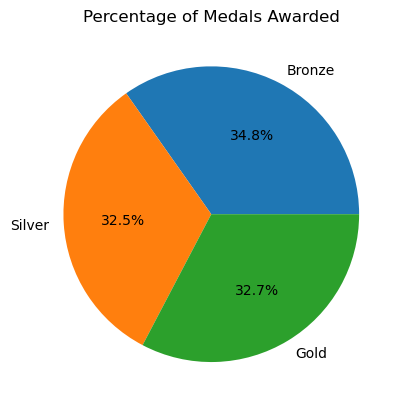

In [58]:
# Because many countries have had multiple athletes win medals, 
# for this graph I had to remove duplicate entries for each country to prevent counting their medal total multiple times.
final_df_no_dup = final_df.drop_duplicates(subset=['web_Country'])

# Because not all countries have been awarded a medal,
# I had to create a sub dataframe where all entries with null in the web_Combo_Total col have been dropped.
df_medal_earned = final_df_no_dup.dropna(subset=['web_Combo_Total'])

# Assign variables for the sum of all bronze medals, silver medals, and gold medals.
bt = sum(df_medal_earned['web_Combo_Bronze'])
st = sum(df_medal_earned['web_Combo_Silver'])
gt = sum(df_medal_earned['web_Combo_Gold'])

# Assign a variable and corresponding labels with all three medal sums to be used when creating pie graph.
y = (bt, st, gt)
mylabels = ["Bronze", "Silver", "Gold"]

# Create pie graph including labels and percentage of the total pie.
plt.pie(y, labels = mylabels, autopct='%.1f%%')

# Add title to pie graph.
plt.title("Percentage of Medals Awarded")

# Display graph.
plt.show()

**Visualization 2-** Scatter plot of medals awarded over time. *(flat_df)*

It's interesting that there is a large drop in medals awarded in every other Olympics beginning in 1994.  I looked into this and prior to 1994, Winter and Summer Olympics were held in the same year.  After 1992, the International Olympic Committee decided to alternate Winter and Summer games so an Olympics would be held every two years instead of every four.  The lower medal earning years are when the Winter Olympics, which awards less medals than the Summer Olympics, were held in years that did not also have a Summer Olympics.

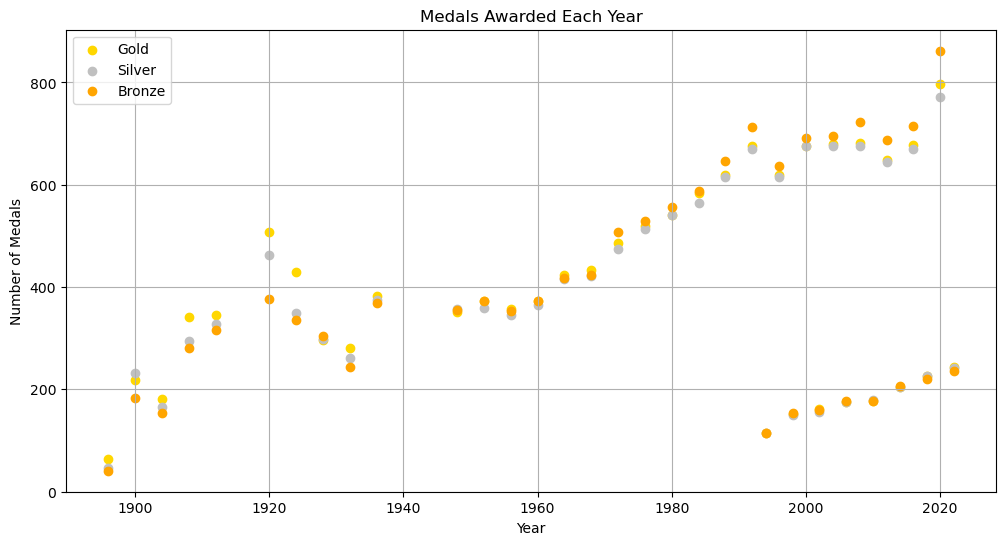

In [59]:
# Use groupby to create a new df summing how many of each medal was awarded each year.
# Use .value_counts() to count the number of times each value (Gold, Silver, Bronze, na) occur in the flat_Medal col.
# Use .unstack to format in a readble table of years and number of medals awarded.
grouped_medals = final_df.groupby(['flat_Year'])['flat_Medal'].value_counts().unstack()

# I was receiving a Key Error when using flat_Year and I realized my current dataframe uses this as an index, not a callable col.
# I reset the index to make 'flat_Year' a regular column
grouped_medals = grouped_medals.reset_index()

# Create scatter plots for the number of Gold, Silver, and Bronze medals awawrded over time.
# Adjust size for ease of viewing.
plt.figure(figsize=(12, 6))

# Use 'o' to notate when an Olympics occured.
# Assign colors to match color of medal (this was fun).
plt.scatter(grouped_medals['flat_Year'], grouped_medals['Gold'], label='Gold', color='gold', marker='o')
plt.scatter(grouped_medals['flat_Year'], grouped_medals['Silver'], label='Silver', color='silver', marker='o')
plt.scatter(grouped_medals['flat_Year'], grouped_medals['Bronze'], label='Bronze', color='orange', marker='o')

# Include labels, title, legend, and grid lines.
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Medals Awarded Each Year')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

**Visualization 3-** Pie chart showing what percent of total medals has been won by each region. *(flat_df and api_df)*

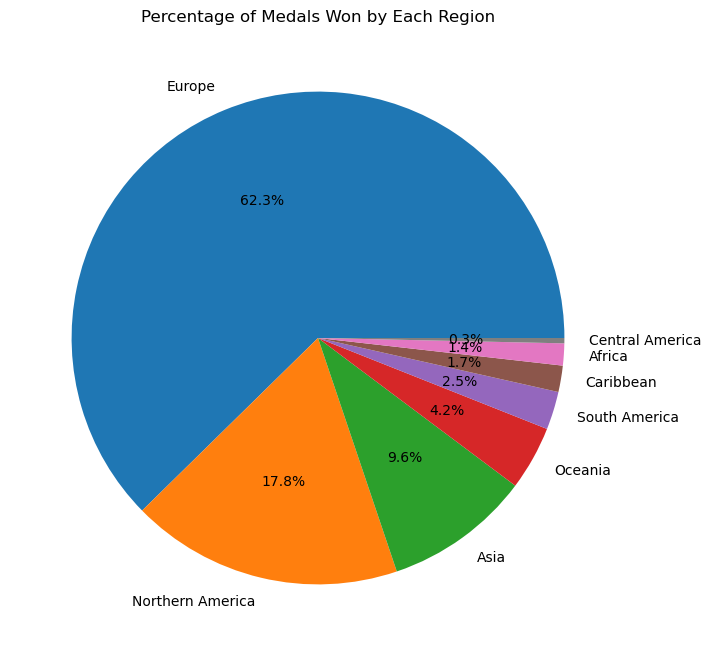

In [60]:
# Group the data by 'api_Region' and count the number of times 'flat_is_medal_winner'] == 'Yes' for each region.
region_medal_count = final_df[final_df['flat_is_medal_winner'] == 'Yes']['api_Region'].value_counts()

# Calculate the total sum of all medal winners which is needed to find a percentage for each region.
total_medal_winners = region_medal_count.sum()

# Calculate the percentage of medals won by each region.
region_percentages = (region_medal_count / total_medal_winners) * 100

# Create pie chart.
#Increase size of chart for ease of viewing since there are several slices of pie.
#Include labels and percentage each piece of pie represents.
plt.figure(figsize=(8, 8))
plt.pie(region_percentages, labels=region_percentages.index, autopct='%1.1f%%')
plt.title('Percentage of Medals Won by Each Region')

# Display pie chart.
plt.show()

**Visualization 4-** Histogram showing how many countries are in each region. *(api_df)*

I was surprised by how dominant Europe is in the above pie chart, but then I realized that there are more countries in Europe than in other regions so Europe has more opportunities to win medals.  The below histogram shows that Europe has the third highest number of countries.  Africa has the most countries, but a very small percentage of overall medals (as displayed in the above pie chart).

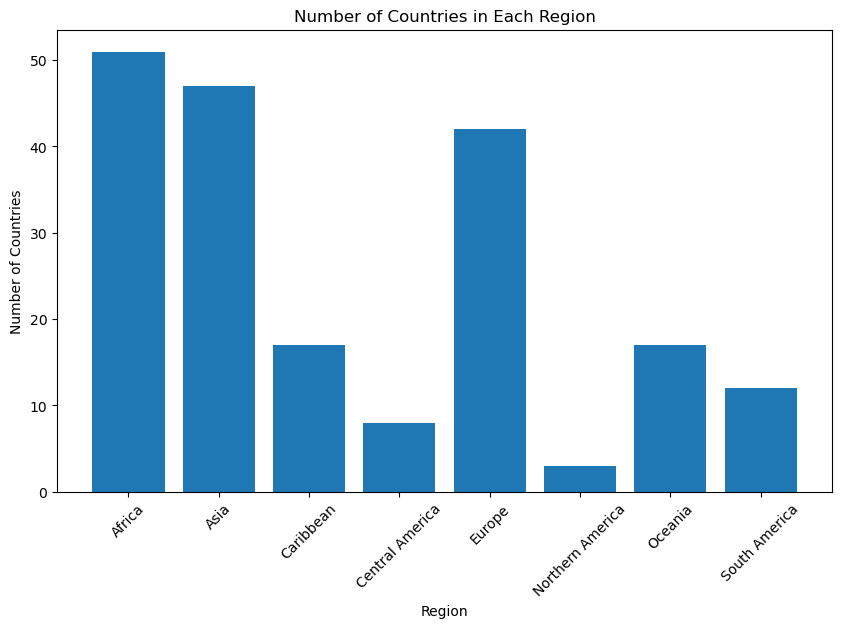

In [61]:
# Group the data by 'api_Region' and count unique 'api_Country' values.
# Reset index so api_Region is a callable column and not the index.
region_country_counts = final_df.groupby('api_Region')['api_Country'].nunique().reset_index()

# Create a histogram.
# Increase size of chart for ease of viewing.
# Include labels and titles.
# Rotate the x-axis labels for ease of viewing.
plt.figure(figsize=(10, 6))
plt.bar(region_country_counts['api_Region'], region_country_counts['api_Country'])
plt.xlabel('Region')
plt.ylabel('Number of Countries')
plt.title('Number of Countries in Each Region')
plt.xticks(rotation=45)

# Display histogram.
plt.show()

**Visualization 5-** Bar chart showing GDP of top and bottom medal winning countries. *(web_df and api_df)*

Since Africa has so many countries but so few medals, I'm curious if this is a result GDP as money is needed for top level training, facilities, equipment, etc.

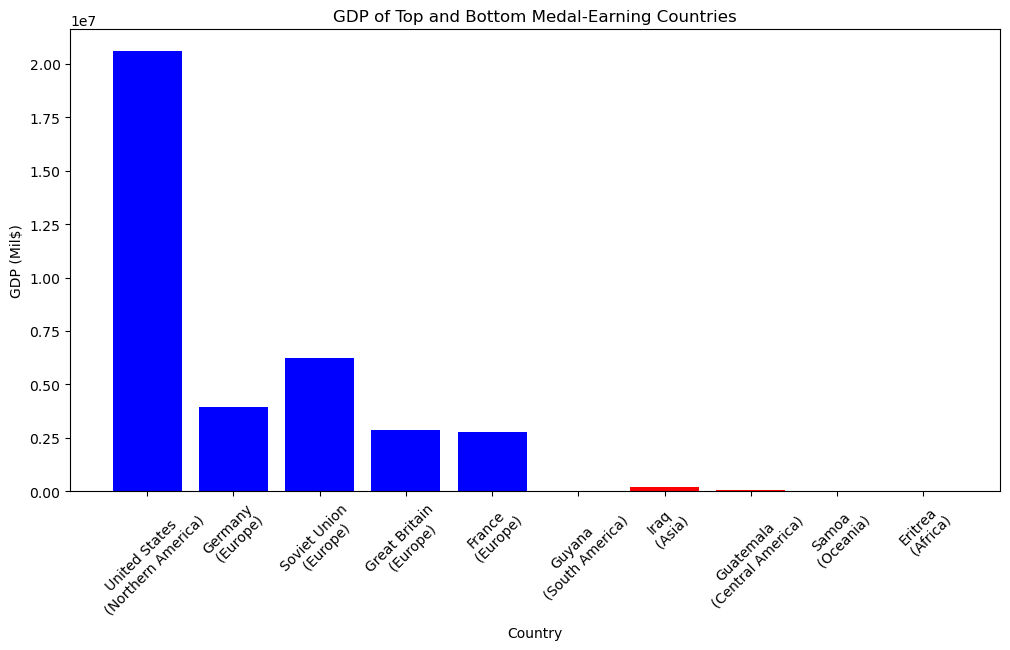

In [84]:
# Make a sub dataframe with Rank, Country, and GDP.
# Drop countries with null in web_Combo_Rank as these are countries that have never won a medal.
sub_df = final_df[['web_Combo_Rank', 'web_Country', 'api_GDP(Mil$)', 'api_Region']]
sub_df = sub_df.drop_duplicates().dropna(subset=['web_Combo_Rank'])

# Sort the DataFrame by medal count so highest medal winning countries are at the top.
sub_df.sort_values(by='web_Combo_Rank', ascending=True, inplace=True)

# Assign the top and bottom ten medal winning countries to their own variable.
top_countries = sub_df.head(5) 
bottom_countries = sub_df.tail(5)

# Create a histogram to display the GDP of top and bottom countries.
# Adjust size of graph for ease of viewing.
plt.figure(figsize=(12, 6))
plt.bar(top_countries['web_Country'] +  '\n' + ' (' + top_countries['api_Region'] + ')', top_countries['api_GDP(Mil$)'], color='b')
plt.bar(bottom_countries['web_Country'] +  '\n' + ' (' + bottom_countries['api_Region'] + ')', bottom_countries['api_GDP(Mil$)'], color='r')

# Include labels, title and legend.
# Rotate the x-axis labels for ease of viewing.
plt.xlabel('Country')
plt.ylabel('GDP (Mil$)')
plt.title('GDP of Top and Bottom Medal-Earning Countries')
plt.xticks(rotation=45)

# Show the graph
plt.show()

**Visualization 6-** Histogram showing how many of each gender has earned a medal. *(flat_df)*

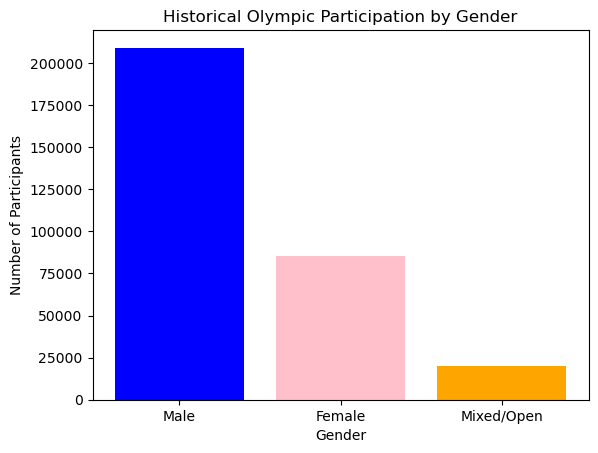

In [64]:
# Group the data by gender and count the number of medal winners in each group
gender_counts = final_df['flat_Gender'].value_counts()

# Create a histogram,
# Differentiate the genders by color.
# Include labels and title.
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Number of Participants')
plt.title('Historical Olympic Participation by Gender')

# Display graph.
plt.show()

**Visualization 7-** Line graph of how gender particilation has changed over time. (flat_df)

Based on the above histogram, I was interested to see how gender participation in the Olympics has changed over time. It's interesting to see the how the gap between the number of male and female participants has narrowed. 

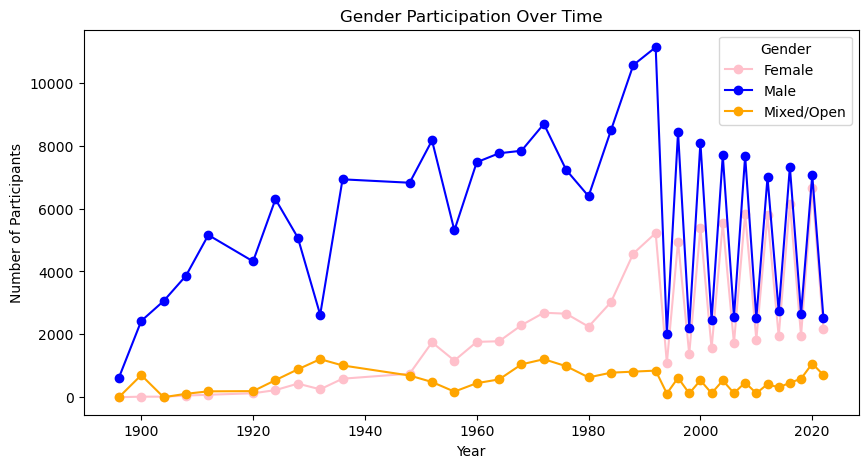

In [65]:
# Count the occurance of each gender that participated each year.
gender_counts = final_df.groupby('flat_Year')['flat_Gender'].value_counts().unstack(fill_value=0)

# Create a line graph to visualize gender participation over time for each gender.
# Adjust graph size for ease of viewing.
# Use 'o' to notate when an olympics occured.
# Assign colors to match the above histogram
# Include labels, title, and legend.
plt.figure(figsize=(10, 5))
plt.plot(gender_counts.index, gender_counts['Female'], marker='o', color='pink', label='Female')
plt.plot(gender_counts.index, gender_counts['Male'], marker='o', color='blue', label='Male')
plt.plot(gender_counts.index, gender_counts['Mixed/Open'], marker='o', color='orange', label='Mixed/Open')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.title('Gender Participation Over Time')
plt.legend(title='Gender')

# Show the graph.
plt.show()

**Visualization 8-**  Histogram of top medal winning athletes in each region. *(flat_df and api_df)*

This was difficult as when I initally made the graph, the x-axis only had athlete names and I felt that didn't provide the context that I intended for this graph.  I googled how to add the Region and Sport to the x-axis and was happy with the result!  I also had hoped to do this by country, but it resulted in a graph that was too busy and difficult to read so I backed off and just did it by region.

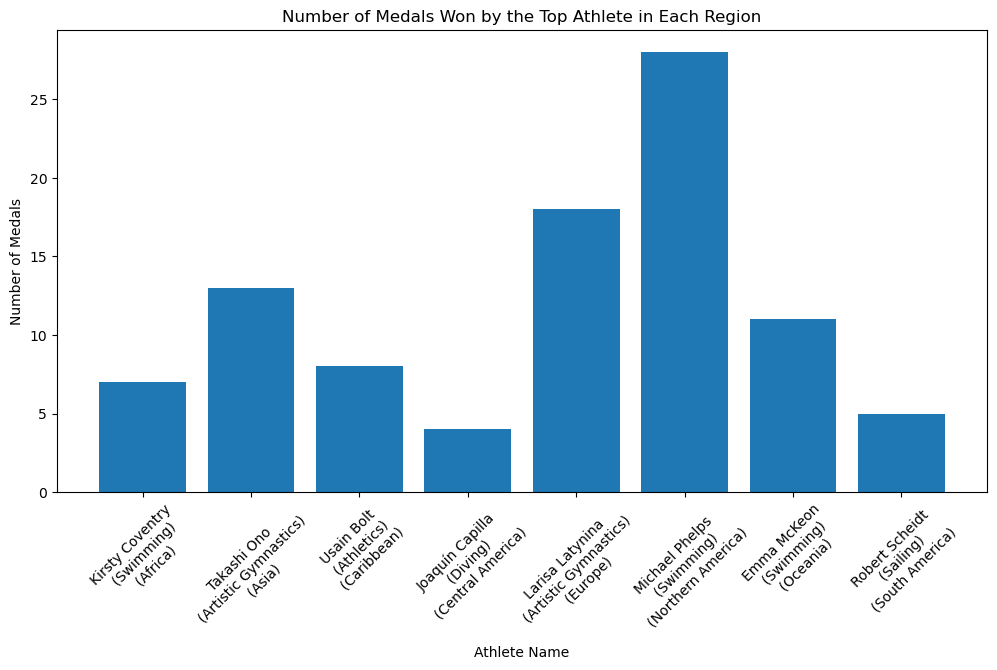

In [66]:
# Filter the data to include only medal winners ('flat_is_medal_winner' == 'Yes')
medal_winners = final_df[final_df['flat_is_medal_winner'] == 'Yes']

# Group the data by 'flat_Athlete_Name' and 'api_Region' and count the number of medals for each athlete in each region.
# Reset and rename index so I can use the index in a newly created Medal_Count col.
medal_counts = medal_winners.groupby(['flat_Athlete_Name', 'api_Region', 'flat_Sport'])['flat_is_medal_winner'].count().reset_index(name='Medal_Count')

# Sort the data by the number of medals in descending order.
medal_counts = medal_counts.sort_values(by=['api_Region', 'Medal_Count'], ascending=[True, False])

# Keep only the top medal-earning athlete per region and drop the rest.
top_medal_earners = medal_counts.drop_duplicates(subset=['api_Region'], keep='first')

# Create a histogram to visualize the number of medals won by the top athlete in each region.
# Adjust the size of graph for ease of viewing.
plt.figure(figsize=(12, 6))

# Create histogram and add sport and region to the x-axis labels.
# Include labels and title.
# Rotate the x-axis labels for ease of viewing.
plt.bar(top_medal_earners['flat_Athlete_Name'] +  '\n' + ' (' + top_medal_earners['flat_Sport'] + ')'  +  '\n' + ' (' + top_medal_earners['api_Region'] + ')', top_medal_earners['Medal_Count'])
plt.xlabel('Athlete Name')
plt.ylabel('Number of Medals')
plt.title('Number of Medals Won by the Top Athlete in Each Region')
plt.xticks(rotation=45)

# Show the plot.
plt.show()

**Visualization 9-**  Pie chart showing what percentage of total events (or total medal winning opportunities) each sport has. *(flat_df)*

Based on the above, I found it interesting that several of the top medal winning athletes per region are in the same handful of sports.  I'm hypothesizing that those sports have more medal winning opportunities than other sports and hope to see if this is true via the below pie chart.

Creating this chart for all sports, all Olympics, all time resulted in a very messy and unreadable chart.  Therefore, I made this chart from 2000 onward, for sports with 5 or more events, and only for Summer sports (as the athletes in the above graph are all summer athletes.)  Due to these filters, this isn't the most percise graph, but still provides context to which sports have the greatest medal winning opportunities.

This was a tough one as I had to keep track of all the different filtered dataframes.  I had to call in reinforcements in the form of my coworker to help me with this one!

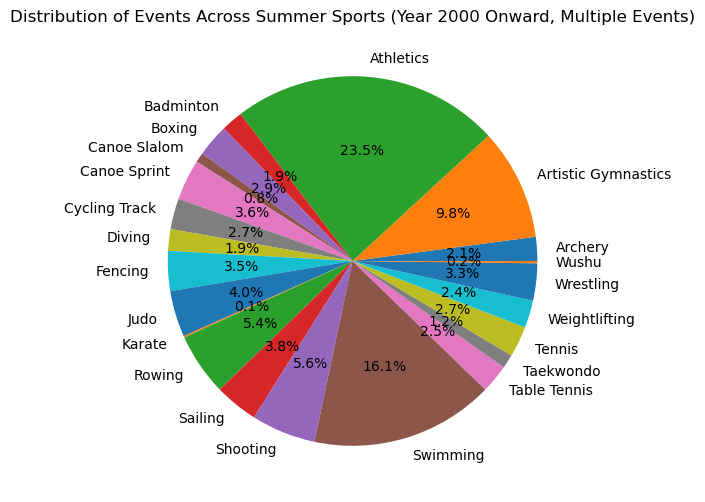

In [67]:
# Create new dataframe filtering for Olympics that occured in the summer on or after the year 2000.
filtered_df = final_df[(final_df['flat_Year'] >= 2000) & (final_df['flat_Season'] == "Summer")]

# Group the filtered data by sport and event, and count the number of unique events for each sport.
sport_event_counts = filtered_df.groupby(['flat_Sport', 'flat_Event'])['flat_Event'].count().reset_index(name='Event_Count')

# Filter sports with greater than or equal to 5 unique events.
sports_with_multiple_events = sport_event_counts.groupby('flat_Sport')['flat_Event'].nunique()
filtered_sports = sports_with_multiple_events[sports_with_multiple_events >= 5].index

# Filter the sport_event_counts dataframe based on the filtered sports with 5 or more events.
filtered_sport_event_counts = sport_event_counts[sport_event_counts['flat_Sport'].isin(filtered_sports)]

# Calculate the total event count for each sport in filtered sports event counts dataframe to use when finding percentages.
sport_total_event_counts = filtered_sport_event_counts.groupby('flat_Sport')['Event_Count'].sum()

# ADjust size of graph for ease of viewing.
fig, ax = plt.subplots(figsize=(10, 6))

# Create a pie chart to display the distribution of events across selected sports.
plt.pie(sport_total_event_counts, labels=sport_total_event_counts.index, autopct='%1.1f%%')

# Include title.
plt.title('Distribution of Events Across Summer Sports (Year 2000 Onward, Multiple Events)')

# Dislay the graph.
plt.show()

**Visualization 10-**  Histogram showing the diversity of how many different sports are competed in each region. *(flat_df and api_df)*

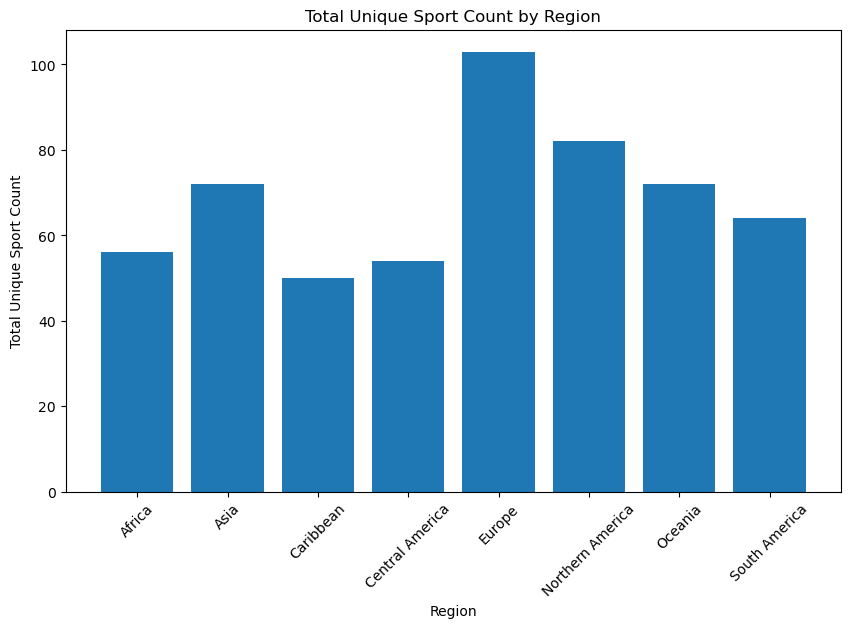

In [68]:
# Make sub dataframe counting the number of unique sports in each region.
# Reset and rename the index so I have a callable col titled Unique_Sport_Count.
count_df = final_df.groupby('api_Region')['flat_Sport'].nunique().reset_index(name='Unique_Sport_Count')

# Create histogram.
# Increase size of chart for ease of viewing.
# Include labels and titles.
# Rotate the x-axis labels for ease of viewing.
plt.figure(figsize=(10, 6))
plt.bar(count_df['api_Region'], count_df['Unique_Sport_Count'])
plt.xlabel('Region')
plt.ylabel('Total Unique Sport Count')
plt.title('Total Unique Sport Count by Region')
plt.xticks(rotation=45)

# Display histogram.
plt.show()

**Bonus Visualizations-** As a big fan of gymnastics, I selfishly made the below visualizations just to satisfy my own curiosity.

The below histogram shows the top medal earning gymnasts of all time.  I was planning to do the top ten, but there is a tie for spots 9-12.

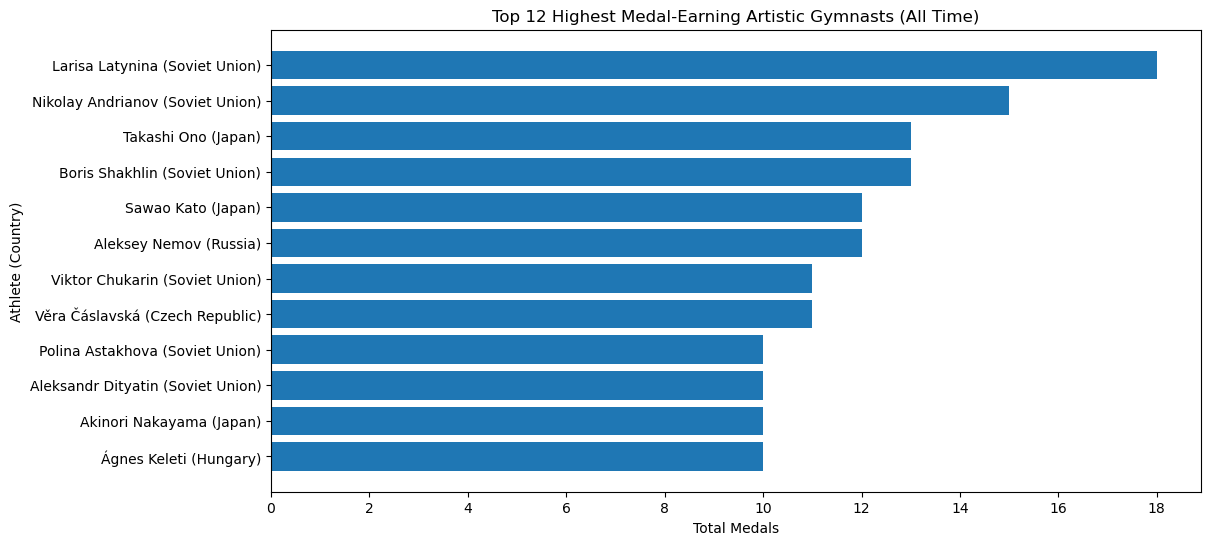

In [69]:
# Create a sub dataframe that only includes entries where flat_Sport = Artistic Gymnastics.
gymnastics_df = final_df[final_df['flat_Sport'] == 'Artistic Gymnastics']

# Group the data by athlete, country, and medal, and find the the number of medals for each athlete in each country.
# Use unstack to turn this into a callable dataframe.
medal_counts = gymnastics_df.groupby(['flat_Athlete_Name', 'api_Country', 'flat_Gender', 'flat_Medal']).size().unstack(fill_value=0)

# Calculate the total number of medals for each athlete.
medal_counts['Total_Medals'] = medal_counts['Bronze'] + medal_counts['Silver'] + medal_counts['Gold']

# Sort the data by total medals in descending order.
# Create another sub dataframe with the top ten athletes.
medal_counts = medal_counts.sort_values(by='Total_Medals', ascending=False)
top_medal_counts = medal_counts.head(12)

# Use a loop and string formatting to create a list with entries in the formate of athlete (country).
# This will be used for graph labels and provide more context to the data in the visualization.
athlete_country_labels = [f'{athlete} ({country})' for athlete, country in top_medal_counts.index.droplevel('flat_Gender')]

# Graph of the number of medals and the athlete/country to which each line is attributed.
# Adjust figure size for ease of viewing.
plt.figure(figsize=(12, 6))
plt.barh(athlete_country_labels, top_medal_counts['Total_Medals'])

# Make it horizontal for better viewing.
plt.gca().invert_yaxis()

# The original graph had tick marks on the x-axis for every 2.5 medals.
# Since one can't have half a mdeal, I adjusted the tick frequency.
plt.xticks(np.arange(0, 20, 2)) 

# Include labels and titles.
plt.xlabel('Total Medals')
plt.ylabel('Athlete (Country)')
plt.title('Top 12 Highest Medal-Earning Artistic Gymnasts (All Time)')

# Display graph.
plt.show()

I recgonize these names and happen to know that these are all gymnasts from the "10.0" era of gymnastics.  In 2006, gymnastics switched to the "open code" which elite athletes compete under today.  I revised the code to find the top gymnasts who have competed under the "open code".  I again had hoped to do the top ten, but another tie required me to do the top 15.

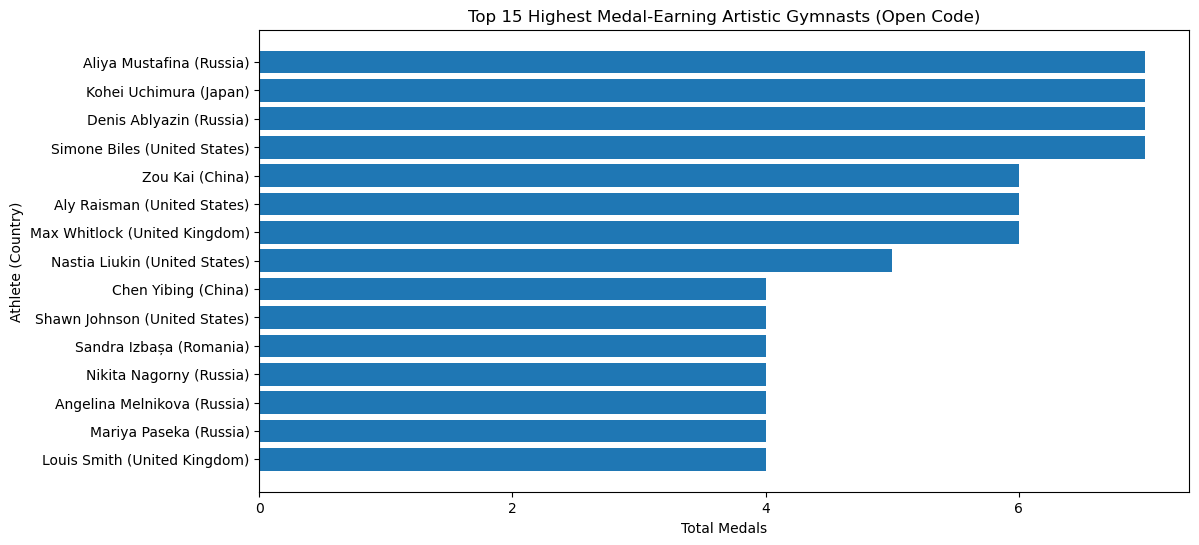

In [70]:
# Create a sub dataframe that only includes entries where flat_Sport = Artistic Gymnastics.
gymnastics_df = final_df[final_df['flat_Sport'] == 'Artistic Gymnastics']

# Filter data from 2006 onward
gymnastics_df = gymnastics_df[gymnastics_df['flat_Year'] >= 2006]

# Group the data by athlete, country, and medal, and find the the number of medals for each athlete in each country.
# Use unstack to turn this into a callable dataframe.
medal_counts = gymnastics_df.groupby(['flat_Athlete_Name', 'api_Country', 'flat_Gender', 'flat_Medal']).size().unstack(fill_value=0)

# Calculate the total number of medals for each athlete.
medal_counts['Total_Medals'] = medal_counts['Bronze'] + medal_counts['Silver'] + medal_counts['Gold']

# Sort the data by total medals in descending order.
# Create another sub dataframe with the top ten athletes.
medal_counts = medal_counts.sort_values(by='Total_Medals', ascending=False)
top_medal_counts = medal_counts.head(15)

# Use a loop and string formatting to create a list with entries in the formate of athlete (country).
# This will be used for graph labels and provide more context to the data in the visualization.
athlete_country_labels = [f'{athlete} ({country})' for athlete, country in top_medal_counts.index.droplevel('flat_Gender')]

# Graph of the number of medals and the athlete/country to which each line is attributed.
# Adjust figure size for ease of viewing.
plt.figure(figsize=(12, 6))
plt.barh(athlete_country_labels, top_medal_counts['Total_Medals'])

# Make it horizontal for better viewing.
plt.gca().invert_yaxis()

# The original graph had tick marks on the x-axis for every 2.5 medals.
# Since one can't have half a mdeal, I adjusted the tick frequency.
plt.xticks(np.arange(0, 8, 2)) 

# Include labels and titles.
plt.xlabel('Total Medals')
plt.ylabel('Athlete (Country)')
plt.title('Top 15 Highest Medal-Earning Artistic Gymnasts (Open Code)')

# Display graph.
plt.show()

I notice several feamle names in the above graph. This surprises me as men have 8 medal opportunities per Olympics and women only have 6.  Plus, typically there is greater longevity with male gymnasts than female gymnasts.  Therefore, male gymnasts have many more opportunities to earn medals so I thought the top medal earners would be mainly male athletes.  Therefore, I added color coding to the graph so I can easily identify the male and female athletes.

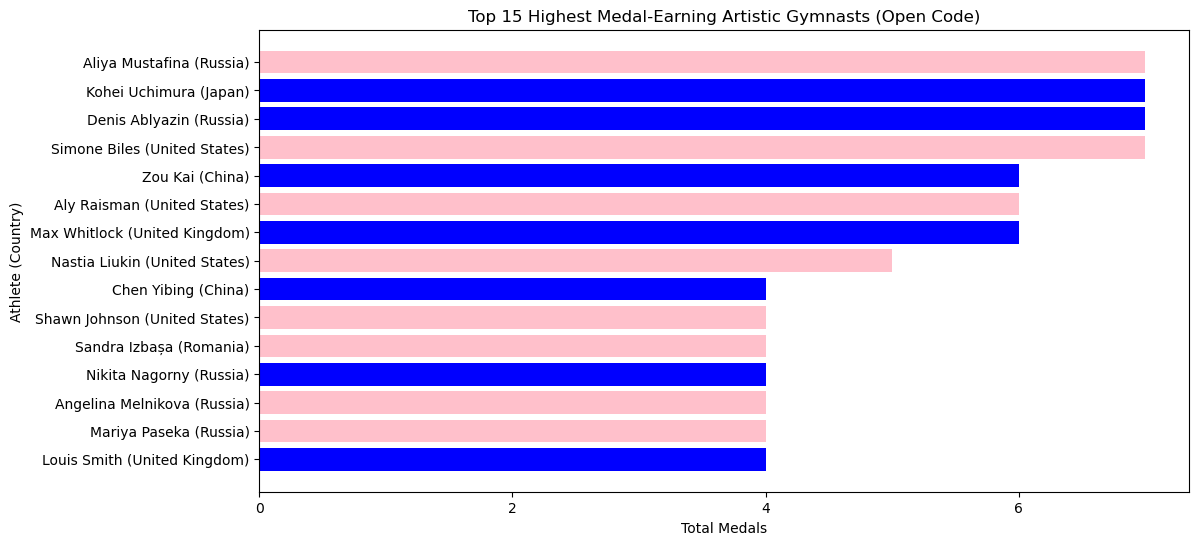

In [71]:
# Create a sub dataframe that only includes entries where flat_Sport = Artistic Gymnastics.
gymnastics_df = final_df[final_df['flat_Sport'] == 'Artistic Gymnastics']

# Filter data from 2006 onward
gymnastics_df = gymnastics_df[gymnastics_df['flat_Year'] >= 2006]

# Group the data by athlete, country, and medal, and find the the number of medals for each athlete in each country.
# Use unstack to turn this into a callable dataframe.
medal_counts = gymnastics_df.groupby(['flat_Athlete_Name', 'api_Country', 'flat_Gender', 'flat_Medal']).size().unstack(fill_value=0)

# Calculate the total number of medals for each athlete.
medal_counts['Total_Medals'] = medal_counts['Bronze'] + medal_counts['Silver'] + medal_counts['Gold']

# Sort the data by total medals in descending order.
# Create another sub dataframe with the top ten athletes.
medal_counts = medal_counts.sort_values(by='Total_Medals', ascending=False)
top_medal_counts = medal_counts.head(15)

# Create colors variable which will be used when creating graph.
# Use a loop to assign pink to all female athletes and blue to all male athletes.
colors = ['blue' if gender == 'Male' else 'pink' for gender in top_medal_counts.index.get_level_values('flat_Gender')]

# Use a loop and string formatting to create a list with entries in the formate of athlete (country).
# This will be used for graph labels and provide more context to the data in the visualization.
athlete_country_labels = [f'{athlete} ({country})' for athlete, country in top_medal_counts.index.droplevel('flat_Gender')]

# Graph of the number of medals and the athlete/country to which each line is attributed.
# Adjust figure size for ease of viewing.
plt.figure(figsize=(12, 6))
plt.barh(athlete_country_labels, top_medal_counts['Total_Medals'], color = colors)

# Make it horizontal for better viewing.
plt.gca().invert_yaxis()

# The original graph had tick marks on the x-axis for every 2.5 medals.
# Since one can't have half a mdeal, I adjusted the tick frequency.
plt.xticks(np.arange(0, 8, 2)) 

# Include labels and titles.
plt.xlabel('Total Medals')
plt.ylabel('Athlete (Country)')
plt.title('Top 15 Highest Medal-Earning Artistic Gymnasts (Open Code)')

# Display graph.
plt.show()

The above graphs only take into account the number of medals won, not the color of the medal. Below, I have assigned a "value" to each color of medal and have graphed the top ten gymnasts with the highest overall value of medals in the Open Code era. This time there were no ties so I could take just the top 10.

In [72]:
# Use mapping to assign points to different medals.
medal_value_map = {'Gold': 3, 'Silver': 2, 'Bronze': 1}

# Use the map function to create the new 'final_Medal_Value' column.
final_df['final_Medal_Value'] = final_df['flat_Medal'].map(medal_value_map)

# Use groupby to find the sum of final_Medal_Value col for each athlete.
# Assign this sum to a new col called final_Total_Medal_Value.
final_df['final_Total_Medal_Value'] = final_df.groupby('flat_Athlete_Name')['final_Medal_Value'].transform('sum')

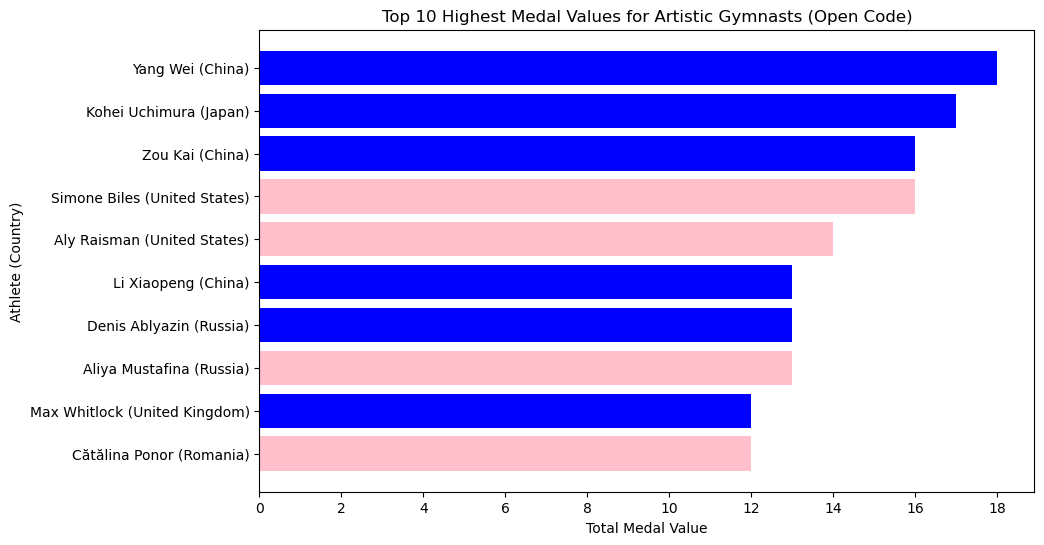

In [73]:
# Create a sub dataframe that only includes entries where flat_Sport = Artistic Gymnastics.
gymnastics_df = final_df[final_df['flat_Sport'] == 'Artistic Gymnastics']

# Filter data from 2006 onward
gymnastics_df = gymnastics_df[gymnastics_df['flat_Year'] >= 2006]

# Sort the data by total medal values in descending order.
# Only keep first row of each athlete name there will be a line for each time the athlete has competed.
# Create another sub dataframe with the top ten athletes.
top_medal_earning_athletes = gymnastics_df.sort_values(by='final_Total_Medal_Value', ascending=False)
top_medal_counts = top_medal_earning_athletes.drop_duplicates(subset='flat_Athlete_Name')
top_medal_counts = top_medal_counts.head(10)

# Create colors variable which will be used when creating graph.
# Use a loop to assign pink to all female athletes and blue to all male athletes.
colors = ['blue' if gender == 'Male' else 'pink' for gender in top_medal_counts['flat_Gender']]

# Plot of the total medal value and the athlete/country to which each line is attributed.
# Adjust figure size for ease of viewing.
plt.figure(figsize=(10, 6))
plt.barh(top_medal_counts['flat_Athlete_Name'] + " (" + top_medal_counts['api_Country'] + ")", 
        top_medal_counts['final_Total_Medal_Value'], color=colors)

# Include labels and titles.
plt.xlabel('Total Medal Value')
plt.ylabel('Athlete (Country)')
plt.title('Top 10 Highest Medal Values for Artistic Gymnasts (Open Code)')

# Make it a horizontal bar graph for better viewing.
plt.gca().invert_yaxis()

# The original graph had tick marks on the x-axis for every 2.5 medals.
# Since one can't have half a mdeal, I adjusted the tick frequency.
plt.xticks(np.arange(0, 20, 2)) 

# Display graph.
plt.show()

**Final Thoughts**

Wow. When I embarked on this project I did not at ALL think of what a mess countries swapping names and boundaries would be. I had a great plan in mind that all IOC Codes would match up and I would just join on those columns and with a snap of my fingers I would have a final data frame comprised of three different tables. That did not happen.  

My largest hurdle was country names not being consistent across all data frames. For example, one data frame might say United States, another says America, and a third says United States of America. All are correct and I was not joining on country name so technically I could have let them all have different names and the final data frame would still be accurate, but it wouldn’t be cohesive and clean which is a problem. Additionally, some countries have special characters such as dashes or umlauts that are present in one data frame and not in another. I could have cleaned this and just removed all special characters, but that would not be respectful to the countries who truly do have these characters in their names. I was dealing with less than 200 unique country names so it was verging on unmanageable to review all of the name discrepancies, but I’d imagine when it gets to a dataset with thousands of unique names that are causing these problems, there has to come a time where being respectful to the data has to take a back seat to clean data.  That is, even if I do not want to remove special characters, it would become unreasonable to review all countries with special characters and the best approach would be to remove them. 

Other issues came when I stared to combine countries such as East Germany, West Germany, and Germany into on German entity. I wanted to do this because I felt it would not be fair to rank Germany against other countries if the original German entity had participated in 11 less Olympics to win medals because it was competing under two different names. I wanted to provide the full context of medals won by each country, but this proved to be quite difficult as I had to look up what a country was formerly called and what boundaries shifted on what year. It took weeks just to clean the countries and at this point, I’m wondering if I were to do it again if it is worth it to consolidate the different country entities or if that is not worth embarking on at the same scale. Of course, some cleanup will be needed but now that the project is complete and I only ranked the countries once it feels like this was a poor task to embark on. If I had known that most of my final visualizations would be regarding the regions since there were too many countries, I could have focused more of my efforts elsewhere. 

I really enjoyed the visualizations. It was fun exploring the data and adding color and different elements to make the visualizations unique. There were several graphs that stemmed off other graphs. I had not considered the question a graph would answer until the previous graph raised it. Unfortunately, most of my data was discrete such as number of medals or number of participants. So I was limited in the types of graphs I could use, but I attempted to have some kind of variety. If I were to continue this project and making visualizations, I might want to add in continuous data such as times and scores so I could potentially have more variety of visualizations. There was a lot of googling involved in finding the best approach to accomplish my goal with the visualizations, but I’m happy with the results. 

Overall, this was a very eye-opening project on how important and laborious data cleaning can be. I suppose my largest takeaway is to have a plan and think about what the data will be used for before I just dive right into cleaning with no anticipation of the final outcome. On the bright side, all the tedious work paid off as once the data was clean, it was fun to play around with the data and make visualizations to answer questions and understand the scope and capabilities of the dataset! 